# Diabetes Patient's Hospital Readmission

In [419]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [420]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## <a id="1"></a> 1. Exploratory Data Analysis
### Importing Libraries

In [421]:
data = pd.read_csv("diabetic_data.csv")
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [422]:
data.shape

(101766, 50)

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [424]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [425]:
IDs_mapping = pd.read_csv("IDs_mapping.csv")
        
display_all(IDs_mapping.head(67))

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


### Target Distribution (Readmitted)

Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0 <br>
<30 : 1

In [426]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

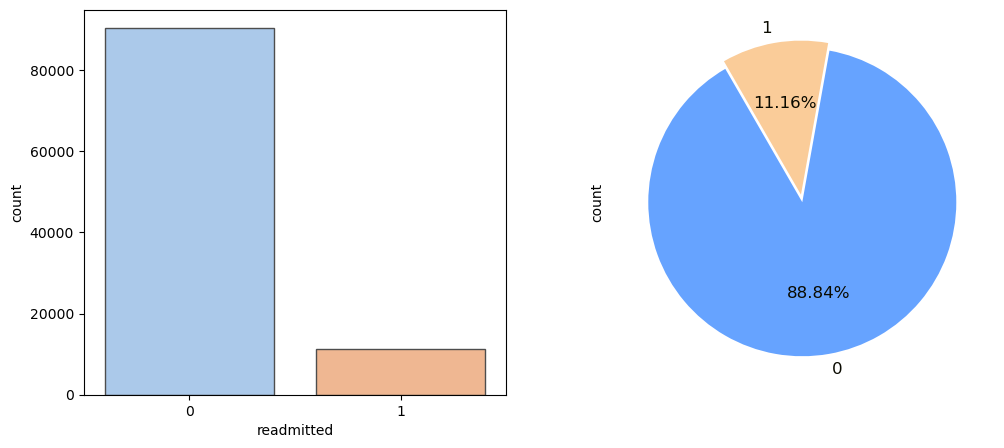

In [427]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=data.readmitted, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [428]:
data.replace('?', np.nan , inplace=True)

### Missing values check

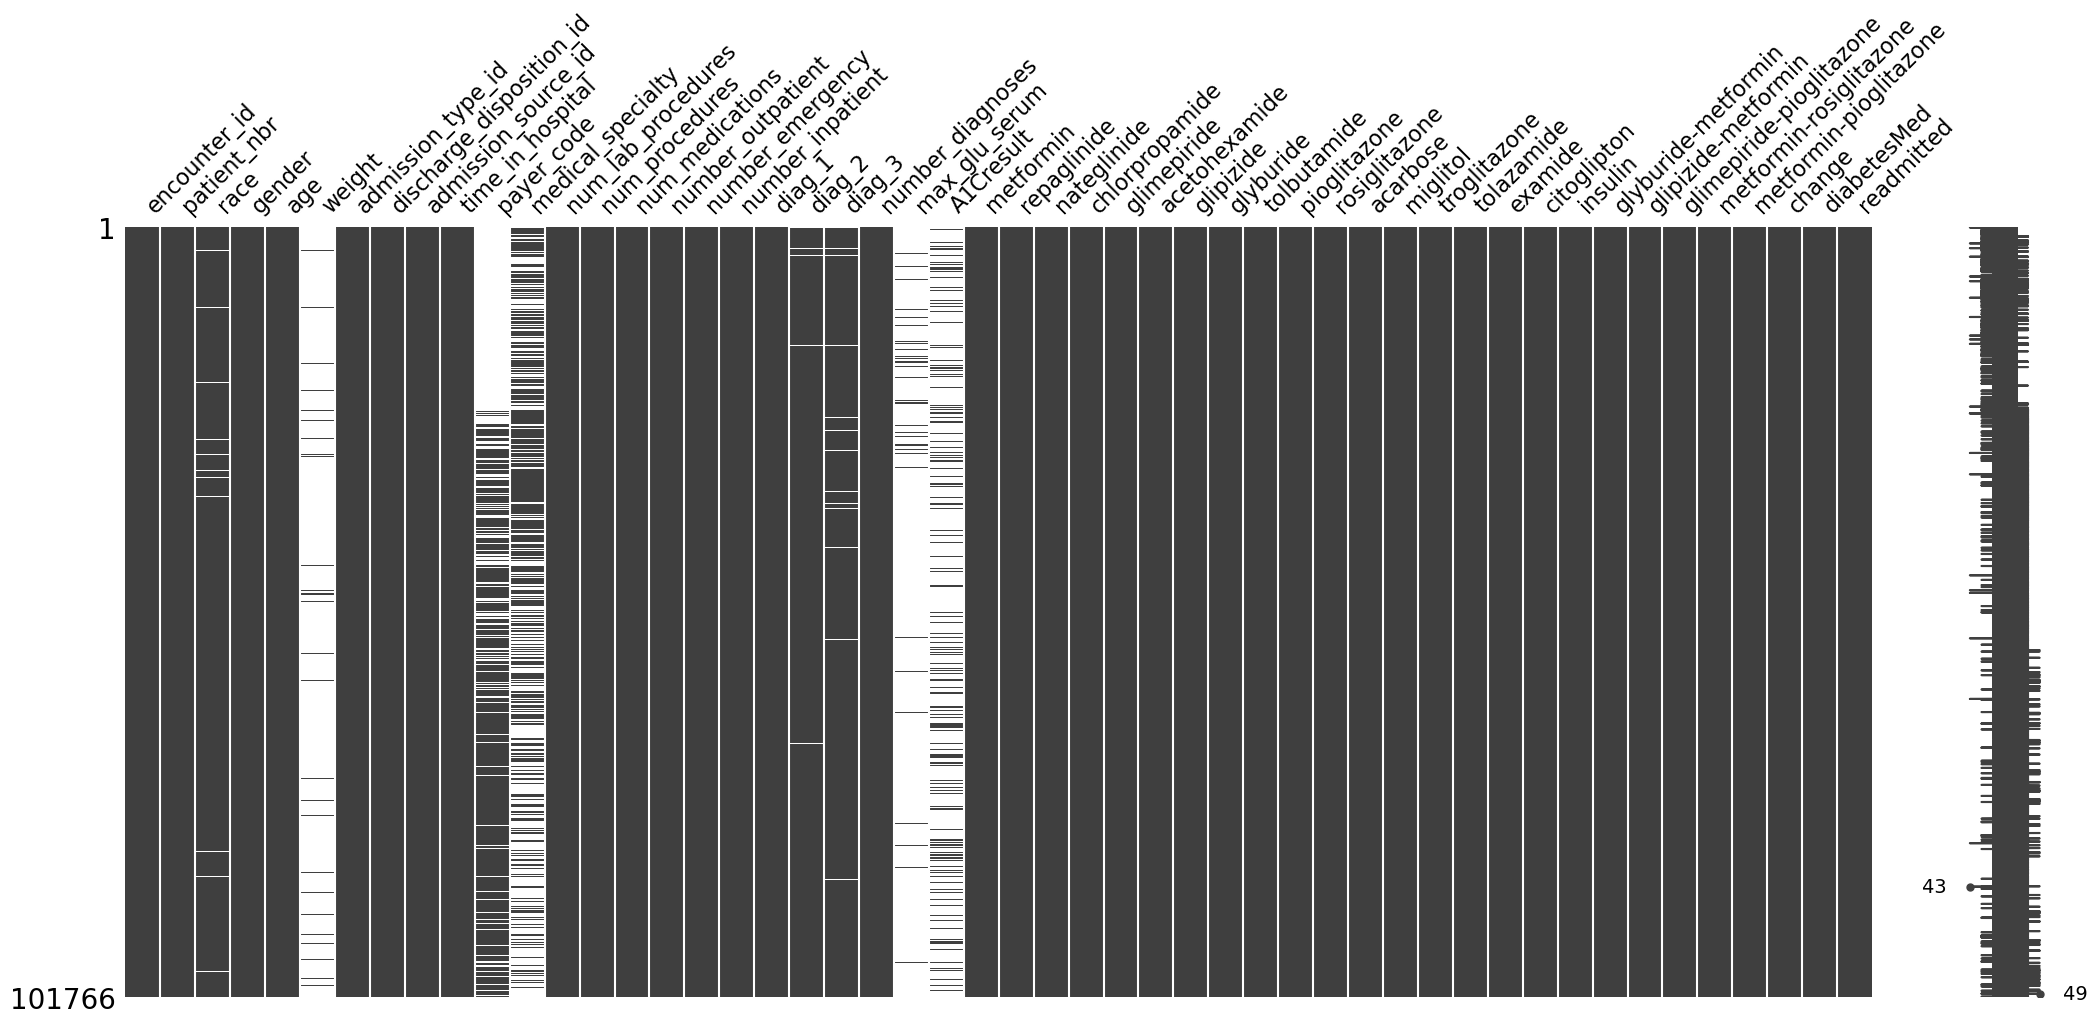

In [429]:
msno.matrix(data)
plt.show()

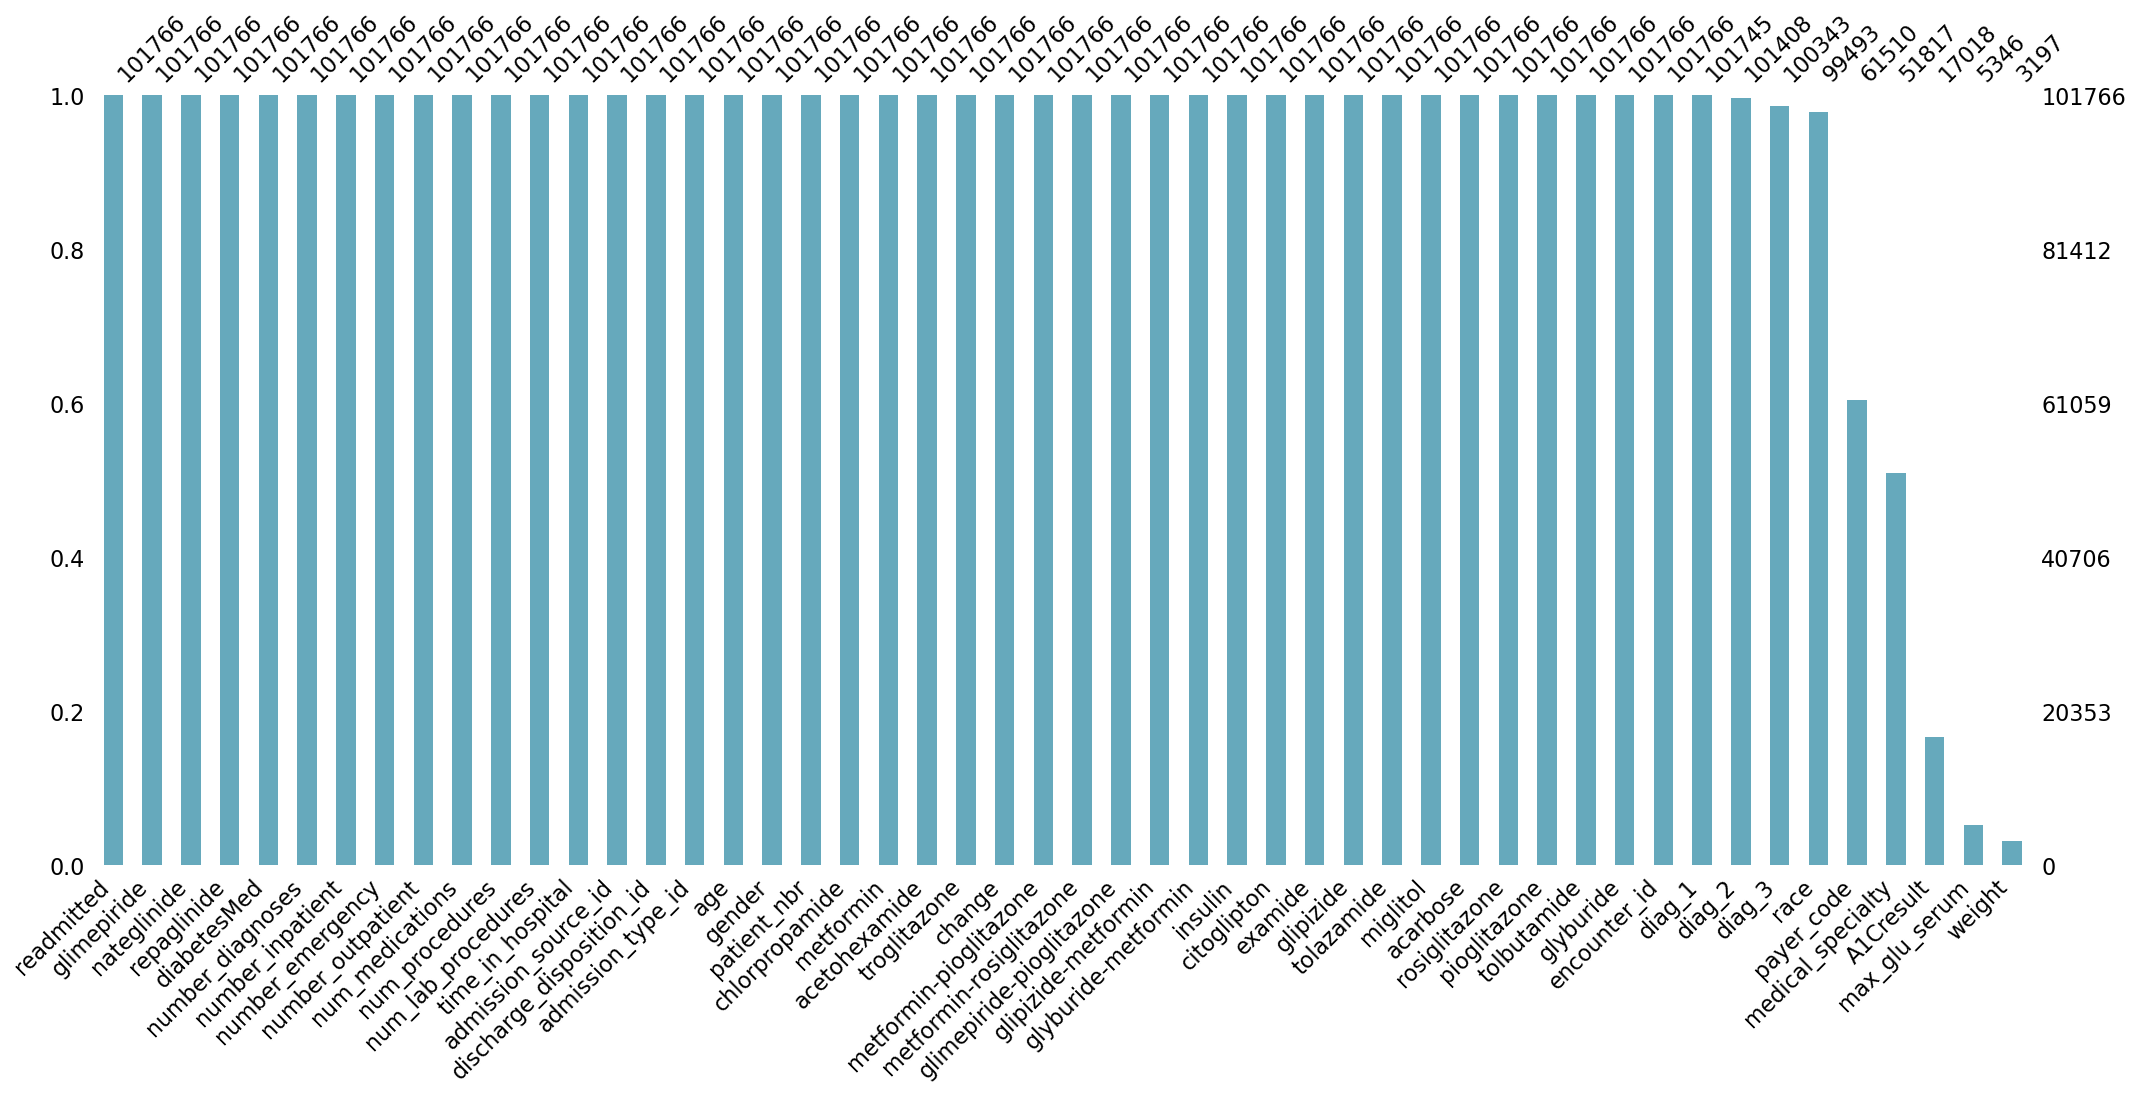

In [430]:
msno.bar(data,sort='descending',color='#66a9bc')
plt.show()

### Detailed representation of data

In [431]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [432]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10
max_glu_serum,101766,96420,0.9475,object,"[nan, >300, Norm, >200]",4
A1Cresult,101766,84748,0.8328,object,"[nan, >7, >8, Norm]",4
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717


### Removing columns with irrelevant information or missing values

In [433]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty', 'max_glu_serum', 'A1Cresult']  
data.drop(drop_list,axis=1, inplace=True)
data_info.drop(drop_list, axis=0,inplace=True)

In [434]:
numerical_columns = ['num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses']

In [435]:
categorical_columns = ['race',
  'diag_3',
  'diag_2',
  'diag_1',
  'tolazamide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'acetohexamide',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'glipizide',
  'repaglinide',
  'glimepiride',
  'gender',
  'age',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'chlorpropamide',
  'metformin',
  'nateglinide',
  'readmitted']

## <a id="2"></a>2. Data Visualization

### Outlier Visualization With BoxPlot:

In [436]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

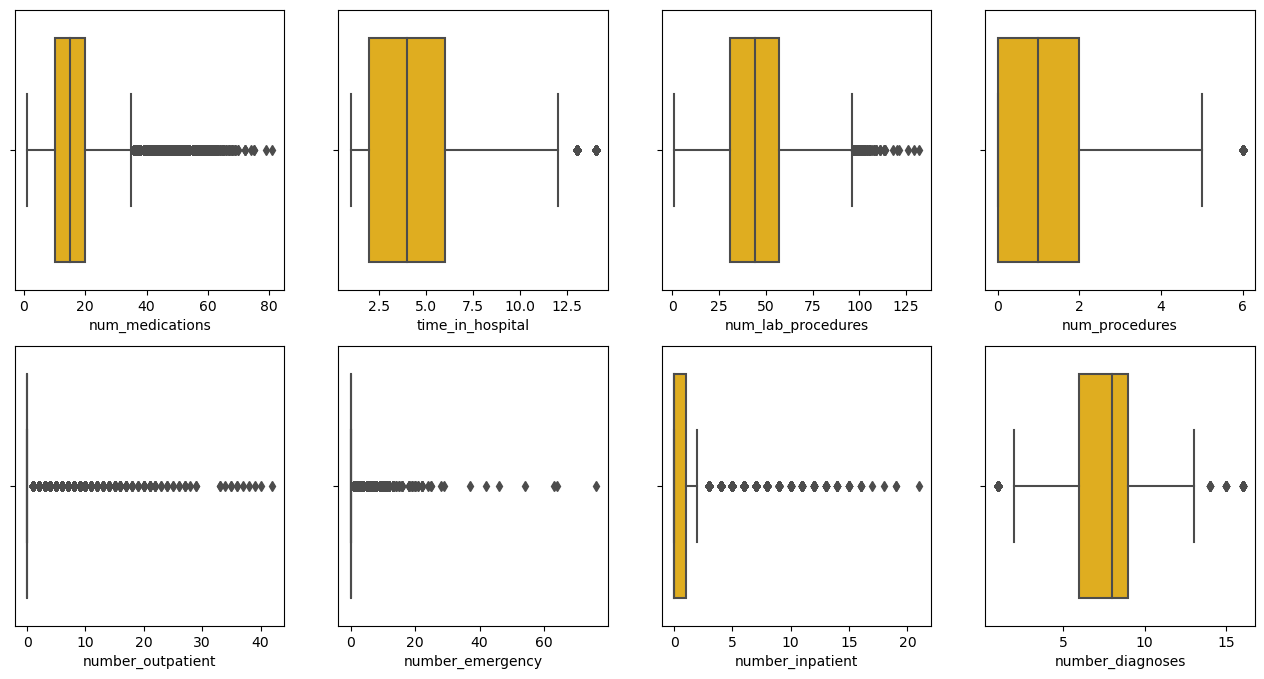

In [437]:
boxplot_for_outlier(data,numerical_columns)

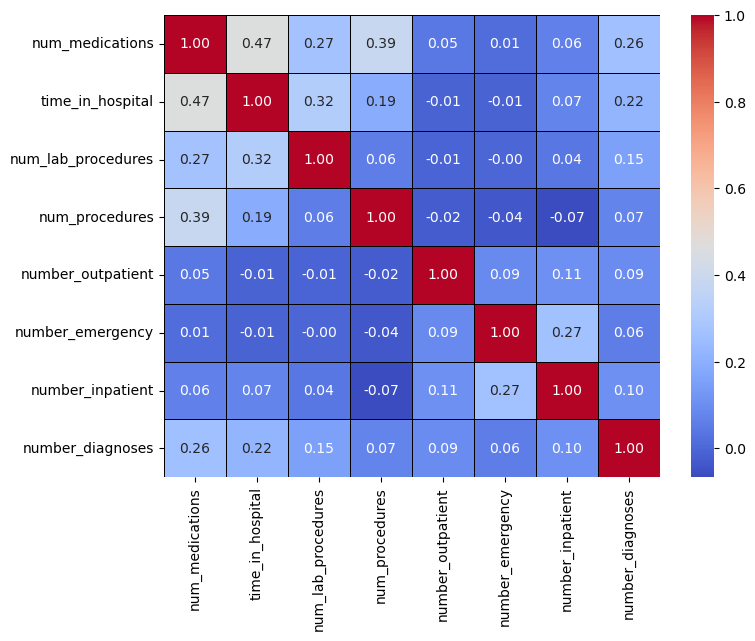

In [438]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

### Gender Distribution

In [439]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [440]:
data.gender.value_counts()

gender
Female    54708
Male      47055
Name: count, dtype: int64

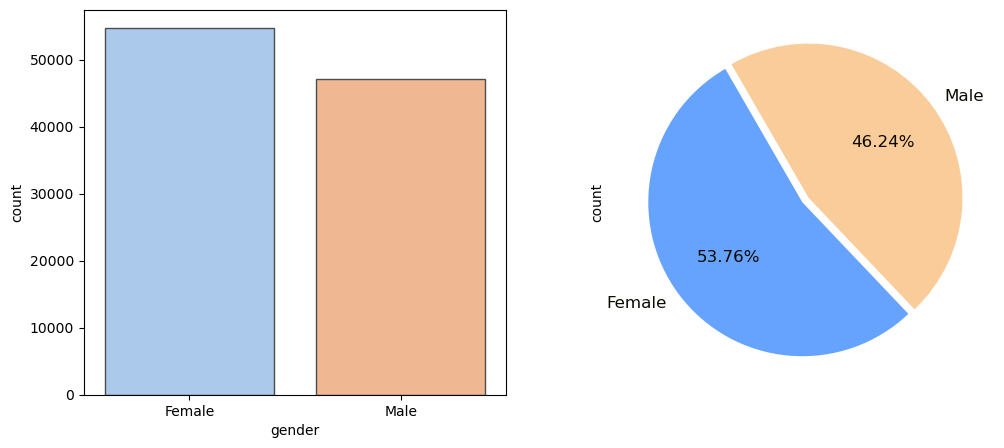

In [441]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

### Gender, Age and Race Visualization

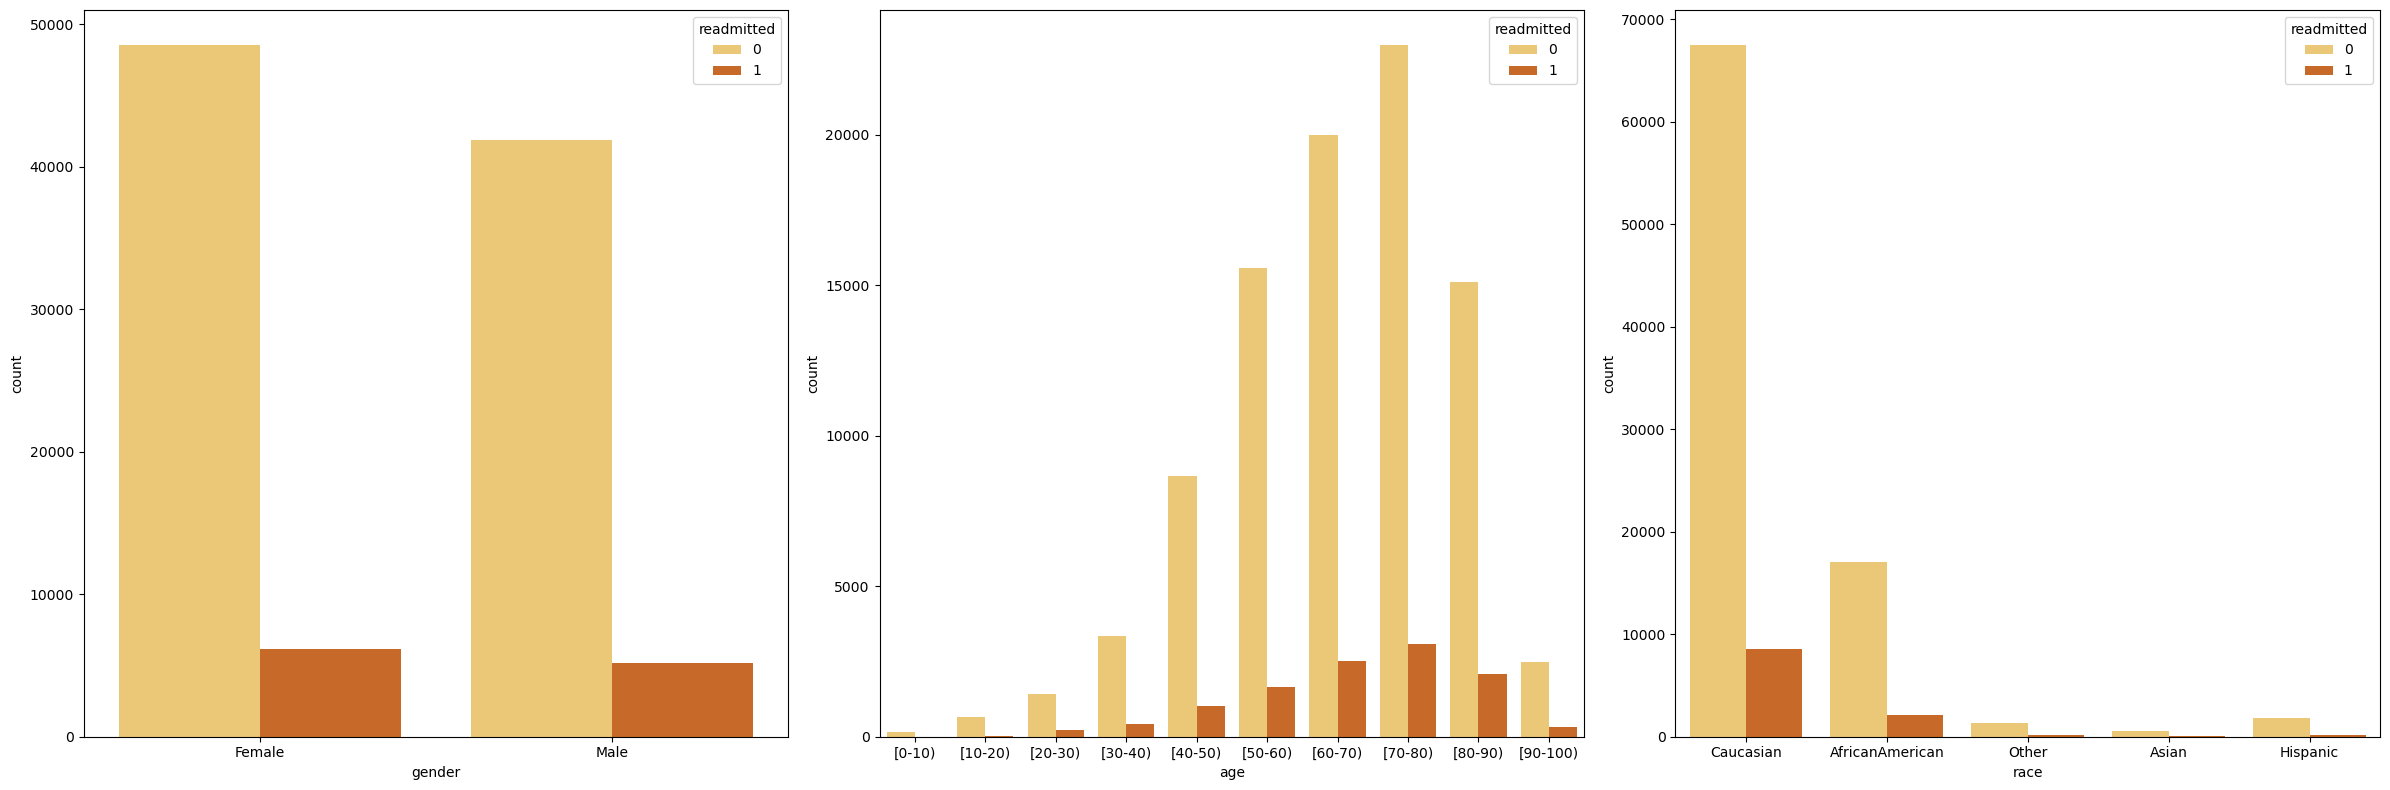

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

visual_list = ['gender', 'age', 'race']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
count = 0

# Loop through the visual list and plot countplots
for i in visual_list:
    sns.countplot(x=data[i], hue=data['readmitted'], palette='YlOrBr', ax=ax[count])
    count += 1  # Increment count

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Effect of the target variable on insulin variable

In [443]:
data.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

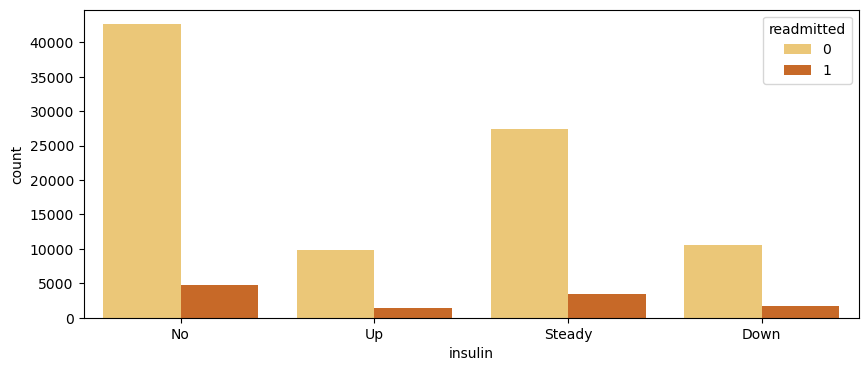

In [444]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="insulin", hue="readmitted", data=data, palette="YlOrBr")
plt.show()

### Visualization of the insulin variable according to the age variable:

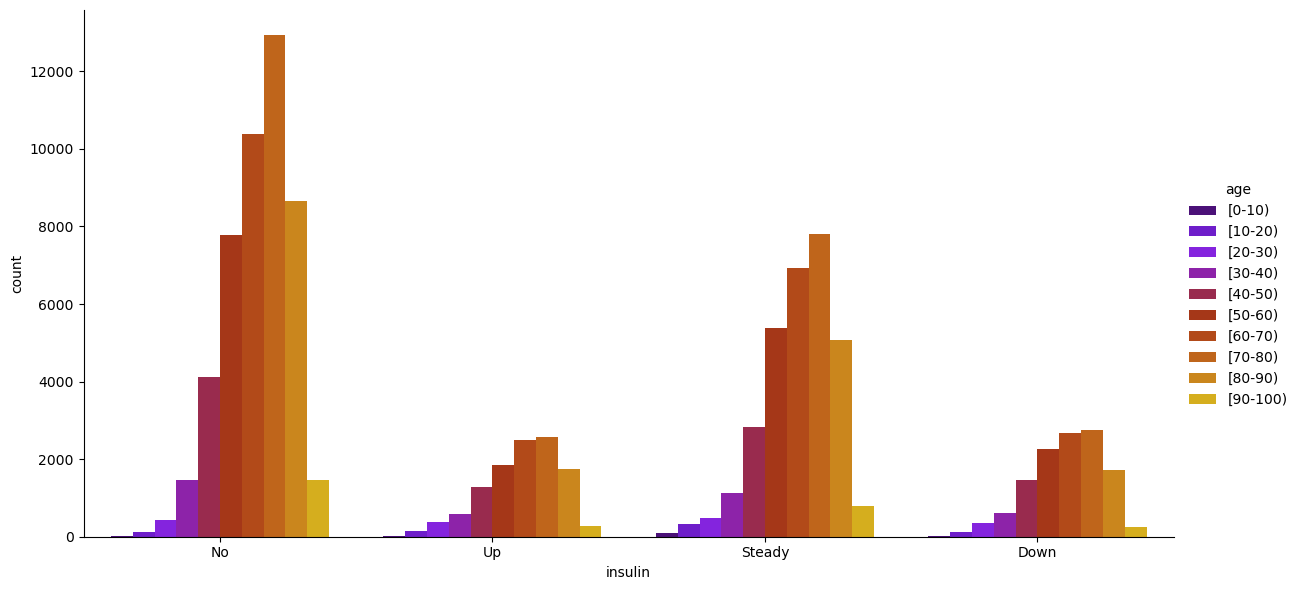

In [445]:
age_list = list(data.age.unique())
sns.catplot(x="insulin", hue="age", data=data, kind="count", height=6, aspect=2, palette="gnuplot");

## <a id="3"></a>3. Feature Engineering

### Missing Value Filling

In [446]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [447]:
data["race"].isnull().sum()

0

In [448]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

### Transforming Diagnostic 1, 2 & 3

In [449]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

In [450]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [451]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [452]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

### Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable:

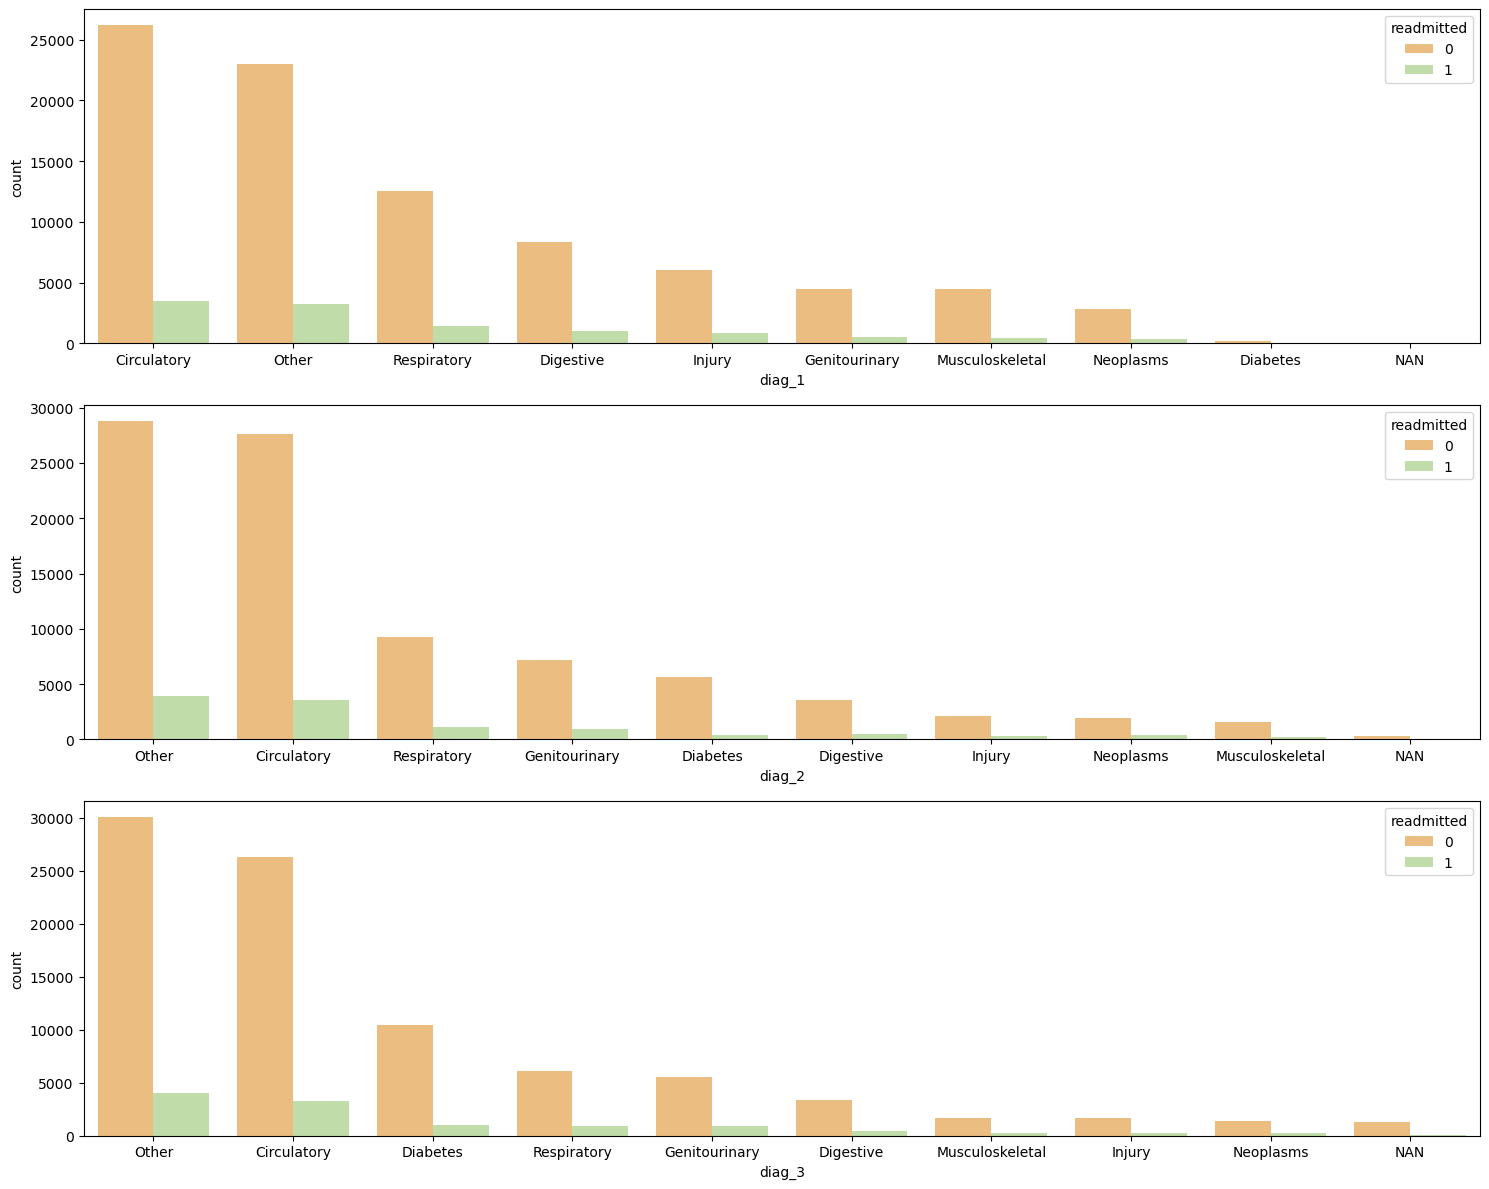

In [453]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
count = 0

# Loop through the diag_list and plot countplots
for i in diag_list:
    sns.countplot(x=data[i], hue=data['readmitted'], palette='Spectral', ax=ax[count], 
                  order=data[i].value_counts().index)
    count += 1  # Increment count

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Outliar Detection with Local Outliar Factor (LOF)

In [454]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(data[numerical_columns])

array([-1, -1,  1, ..., -1,  1,  1])

In [455]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.57313218e+00, -5.00000000e+09, -1.21803487e+00, -1.10355339e+00,
       -1.00000000e+00, -9.26776695e-01, -1.05618622e+00, -1.29289322e+00,
       -9.78217732e-01, -1.19553853e+00, -8.53553391e-01, -1.00000000e+00,
       -1.29289322e+00, -1.10024845e+00, -1.14322501e+00, -1.05511154e+00,
       -1.20710678e+00, -8.53553391e-01, -8.53553391e-01, -9.26776695e-01,
       -1.29289322e+00, -1.00000000e+00, -5.00000000e+09, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.05618622e+00, -1.00000000e+00,
       -1.07647405e+00, -1.10355339e+00])

In [456]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -3.51776695e+10, -2.79110350e+10, -2.44948974e+10,
       -2.23606798e+10, -2.23606798e+10, -2.23536866e+10, -2.00000000e+10,
       -2.00000000e+10, -1.75000000e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.65659482e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [457]:
threshold_value = np.sort(df_scores)[2]

In [458]:
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [459]:
new_df = data[df_scores > threshold_value]

In [460]:
data[df_scores < threshold_value]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93655,Caucasian,Female,[70-80),3,6,1,5,35,0,15,...,No,Up,No,No,No,No,No,Ch,Yes,0
97761,Caucasian,Male,[60-70),1,1,7,3,65,0,8,...,No,No,No,No,No,No,No,No,No,0


In [461]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    data[col] = data[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    data[col] = data[col].astype(int)

In [462]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(data, columns=['race'], prefix=["enc"])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [463]:
df = one_hot_data.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

## Train-Test Split 

In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

In [465]:
ordinal_enc = OrdinalEncoder()
X_train.age = ordinal_enc.fit_transform(X_train.age.values.reshape(-1, 1))
X_test.age = ordinal_enc.transform(X_test.age.values.reshape(-1, 1))

### Encoding

In [466]:
for col in diag_list:
    label_enc = LabelEncoder()
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.fit_transform(X_test[col]) 

In [467]:
binary = ['change', 'diabetesMed', 'gender']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
binary_enc.fit_transform(X_train)
X_train = binary_enc.fit_transform(X_train)
X_test = binary_enc.transform(X_test)

### Resampling techniques — Undersample majority class

Since we have an unbalanced dataset, We will use sampling technique.

In [468]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

readmitted
0    9615
1    9615
Name: count, dtype: int64

In [469]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

### Train-Validation Splitting

In [470]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 42)

## <a id="5"></a>5. Modelling

### Model Selection

In [471]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [472]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [473]:
thresh = 0.5

### Model Selection: Baseline Models

#### Logistic Regression

In [547]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

# Define a function for specificity
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp)

# Create the Logistic Regression model
log_model = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42)

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'fscore': make_scorer(f1_score),
    'specificity': make_scorer(specificity_score)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(
    log_model, X_train, y_train, 
    cv=10,  # 10-fold cross-validation
    scoring=scoring,  # Use the custom scoring metrics
    return_train_score=False  # We don't need train scores for evaluation
)

# Print out the results
print("Logistic Regression - 10-fold Cross Validation")

for metric in cv_results:
    print(f"{metric.capitalize()}: Mean = {cv_results[metric].mean():.4f}, Std = {cv_results[metric].std():.4f}")


Logistic Regression - 10-fold Cross Validation
Fit_time: Mean = 0.1546, Std = 0.0108
Score_time: Mean = 0.0065, Std = 0.0005
Test_accuracy: Mean = 0.6176, Std = 0.0112
Test_auc: Mean = 0.6178, Std = 0.0111
Test_recall: Mean = 0.5429, Std = 0.0176
Test_precision: Mean = 0.6397, Std = 0.0124
Test_fscore: Mean = 0.5873, Std = 0.0142
Test_specificity: Mean = 0.6927, Std = 0.0129


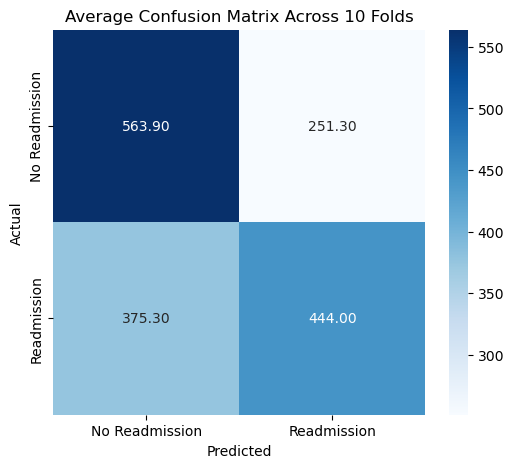

Average Accuracy: 0.6166
Average Precision: 0.6386
Average Recall: 0.5419
Average F1 Score: 0.5862


In [557]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the Logistic Regression model
    log_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = log_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

In [475]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [476]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_val,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.668
accuracy:0.623
recall:0.547
precision:0.646
fscore:0.593
specificity:0.698
 
Validation:
AUC:0.647
accuracy:0.602
recall:0.522
precision:0.614
fscore:0.564
specificity:0.681
 


In [548]:
# Confusion Matrix

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Random Forest Classifier

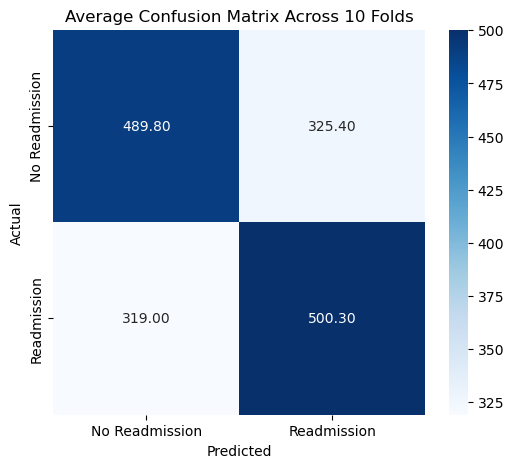

Average Accuracy: 0.6058
Average Precision: 0.6060
Average Recall: 0.6106
Average F1 Score: 0.6082


In [558]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the Random Forest model
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = rf_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [478]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [479]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_val,y_val_preds, thresh)

Random Forest
Training:
AUC:0.663
accuracy:0.623
recall:0.578
precision:0.637
fscore:0.606
specificity:0.669
 
Validation:
AUC:0.640
accuracy:0.600
recall:0.541
precision:0.606
fscore:0.572
specificity:0.658
 


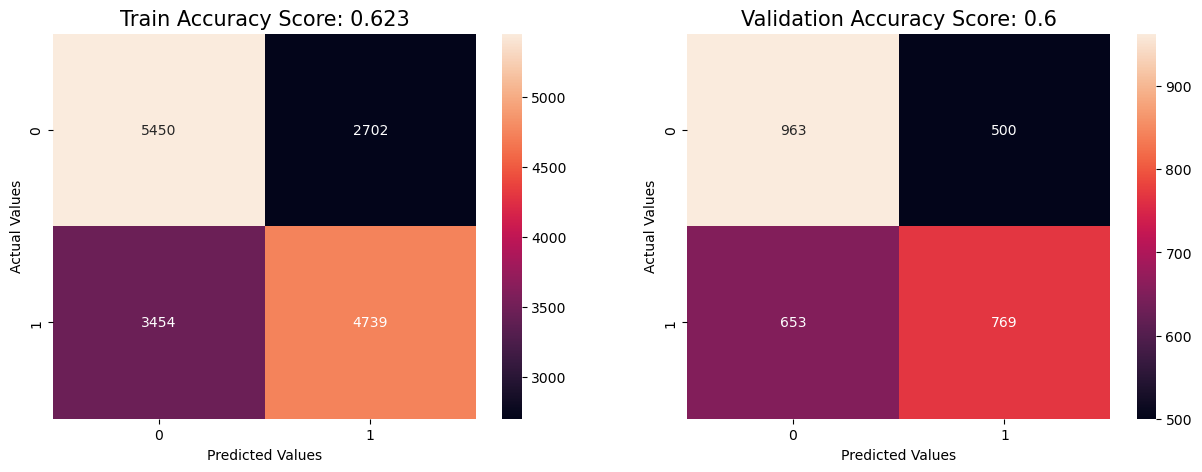

In [480]:
# Confusion Matrix

predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### Gradient Boosting Classifier

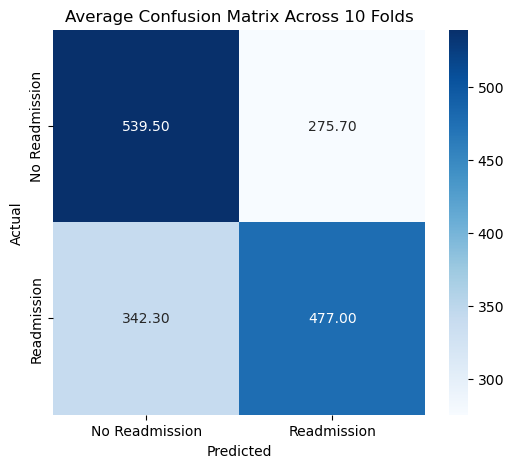

Average Accuracy: 0.6219
Average Precision: 0.6340
Average Recall: 0.5822
Average F1 Score: 0.6068


In [559]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the Gradient Boosting model
    gb_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = gb_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

In [481]:
gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [482]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_val,y_val_preds, thresh)

Gradient Boosing
Training:
AUC:0.692
accuracy:0.641
recall:0.601
precision:0.655
fscore:0.627
specificity:0.682
 
Validation:
AUC:0.655
accuracy:0.613
recall:0.566
precision:0.617
fscore:0.591
specificity:0.659
 


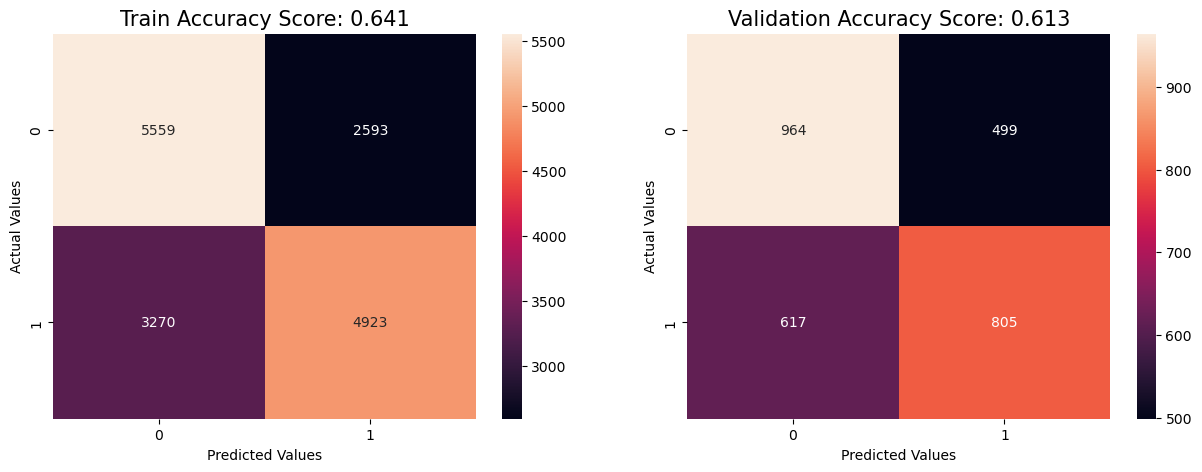

In [483]:
# Confusion Matrix

predictions = gradient_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = gradient_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### XGBOOST Classifier

c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-

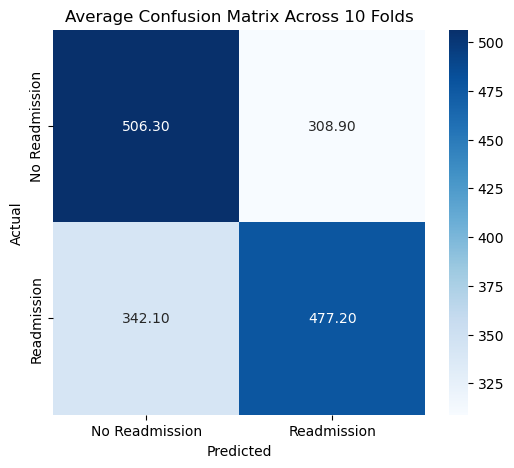

Average Accuracy: 0.6017
Average Precision: 0.6071
Average Recall: 0.5825
Average F1 Score: 0.5945


In [560]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
import xgboost as xgb  # Import XGBoost

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the XGBoost model
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = xgb_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [484]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [485]:
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_val_preds = xgb_model.predict_proba(X_val)[:,1]

print("XGBOOST")
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
xgb_train_auc, xgb_train_accuracy, xgb_train_recall, xgb_train_precision, xgb_train_fscore, xgb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgb_val_auc, xgb_val_accuracy, xgb_val_recall, xgb_val_precision,xgb_val_fscore, xgb_val_specificity = print_report(y_val,y_val_preds, thresh)

XGBOOST
Gradient Boosing
Training:
AUC:0.692
accuracy:0.641
recall:0.601
precision:0.655
fscore:0.627
specificity:0.682
 
Validation:
AUC:0.655
accuracy:0.613
recall:0.566
precision:0.617
fscore:0.591
specificity:0.659
 


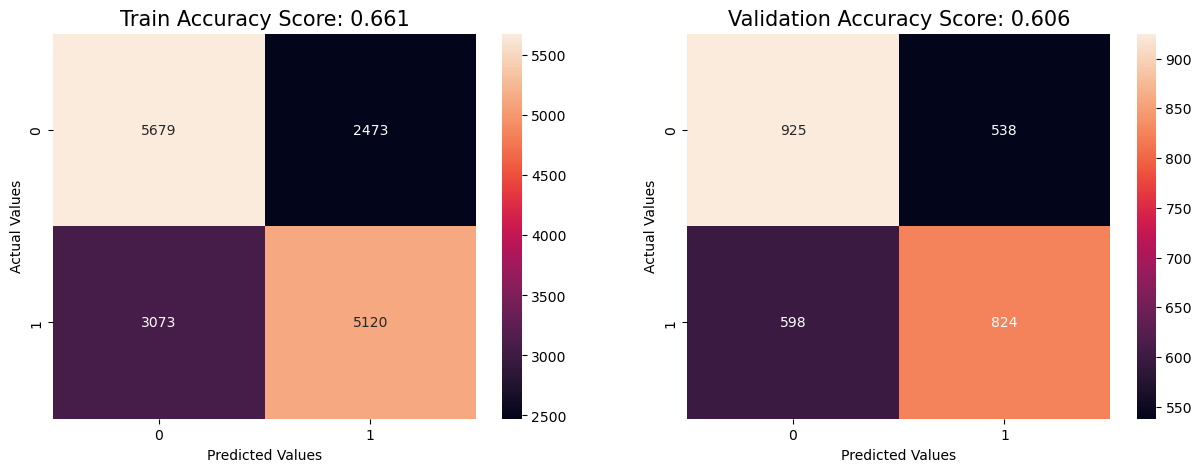

In [486]:
# Confusion Matrix

predictions = xgb_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = xgb_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### Light-GBM Classifier

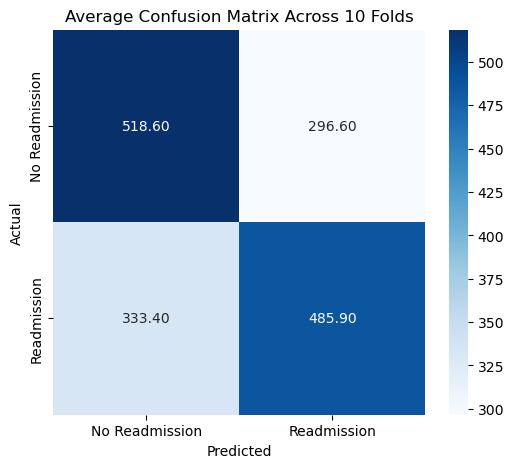

Average Accuracy: 0.6146
Average Precision: 0.6212
Average Recall: 0.5931
Average F1 Score: 0.6067


In [561]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
import lightgbm as lgb  # Import LightGBM

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the LightGBM model
    lgb_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = lgb_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

In [487]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

In [488]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print("LGBM")
print('Training:')
lgbm_train_auc, lgbm_train_accuracy,lgbm_train_recall, lgbm_train_precision,lgbm_train_fscore,lgbm_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lgbm_val_auc, lgbm_val_accuracy, lgbm_val_recall, lgbm_val_precision,lgbm_val_fscore,lgbm_val_specificity = print_report(y_val,y_val_preds, thresh)

LGBM
Training:
AUC:0.691
accuracy:0.641
recall:0.603
precision:0.654
fscore:0.628
specificity:0.679
 
Validation:
AUC:0.655
accuracy:0.607
recall:0.565
precision:0.609
fscore:0.586
specificity:0.647
 


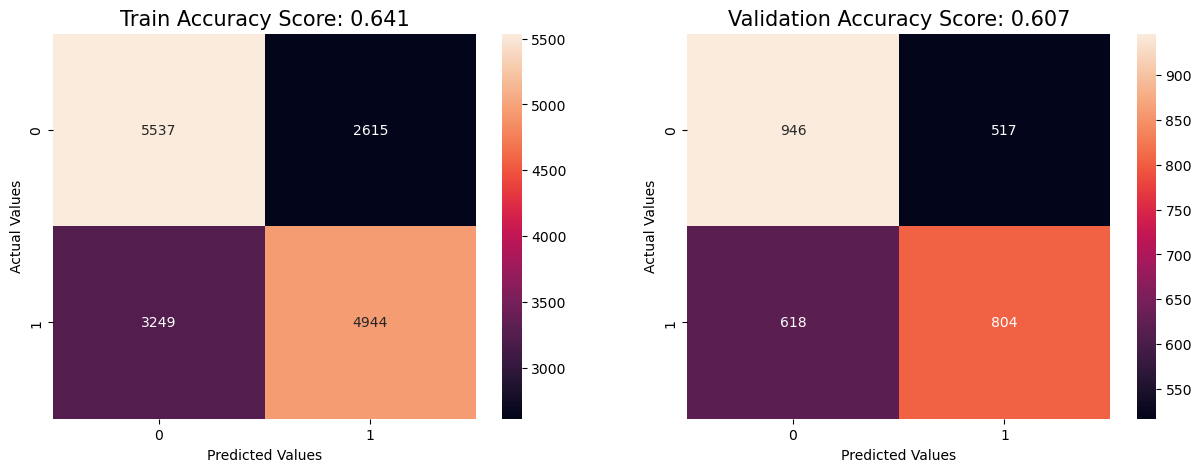

In [489]:
# Confusion Matrix

predictions = lgbm_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = lgbm_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### CATBOOST Classifier

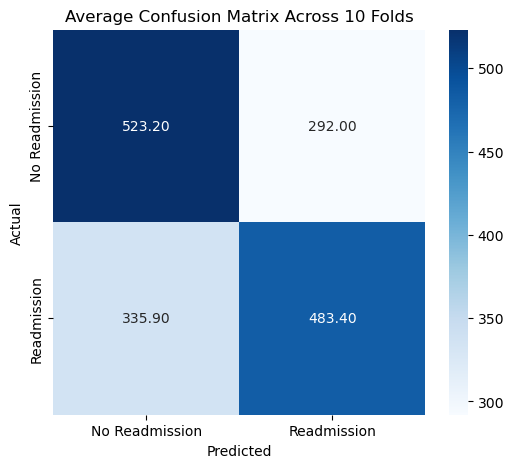

Average Accuracy: 0.6158
Average Precision: 0.6234
Average Recall: 0.5900
Average F1 Score: 0.6062


In [562]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
from catboost import CatBoostClassifier  # Import CatBoost

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Create a list to store the confusion matrices and metrics for each fold
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform 10-fold cross-validation and get predictions for each fold
for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Fit the CatBoost model
    catboost_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation set
    y_val_preds = catboost_model.predict_proba(X_val_fold)[:, 1]
    
    # Convert probabilities to binary predictions using the threshold
    y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
    
    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_val_fold, y_val_pred_binary)
    conf_matrices.append(cm)
    
    # Calculate and store metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
    precisions.append(precision_score(y_val_fold, y_val_pred_binary))
    recalls.append(recall_score(y_val_fold, y_val_pred_binary))
    f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

# Calculate the average confusion matrix and metrics
avg_cm = np.mean(conf_matrices, axis=0)
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Readmission", "Readmission"], yticklabels=["No Readmission", "Readmission"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Average Confusion Matrix Across 10 Folds")
plt.show()

# Print out the metrics
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

In [490]:
cat_model = CatBoostClassifier(random_state = 42, max_depth=3)
cat_model.fit(X_train, y_train,verbose=False)

In [491]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_val_preds = cat_model.predict_proba(X_val)[:,1]

print("CATBOOST")
print('Training:')
catb_train_auc, catb_train_accuracy,catb_train_recall, catb_train_precision,catb_train_fscore,catb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
catb_val_auc,catb_val_accuracy, catb_val_recall, catb_val_precision,catb_val_fscore,catb_val_specificity = print_report(y_val,y_val_preds, thresh)

CATBOOST
Training:
AUC:0.711
accuracy:0.652
recall:0.612
precision:0.666
fscore:0.638
specificity:0.691
 
Validation:
AUC:0.659
accuracy:0.608
recall:0.569
precision:0.610
fscore:0.589
specificity:0.647
 


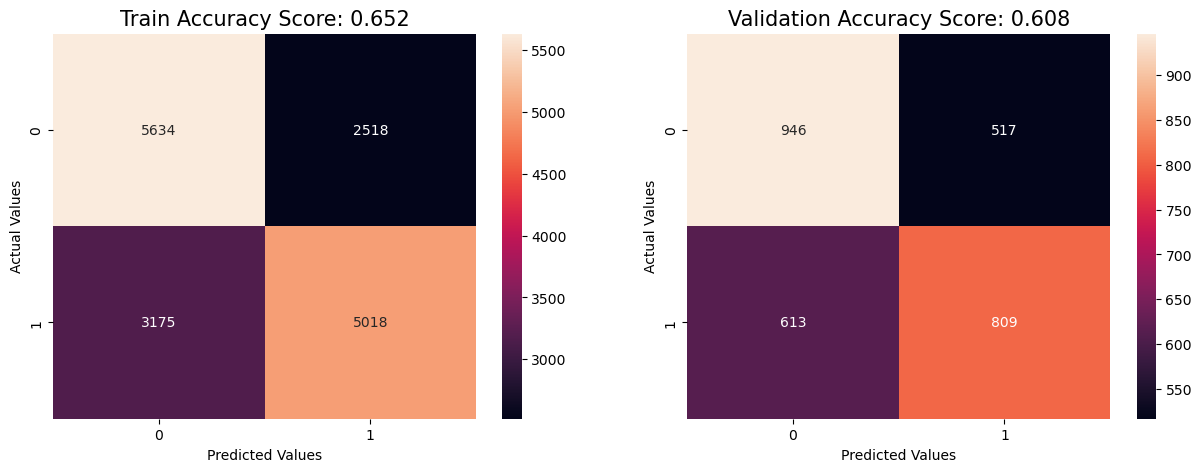

In [492]:
# Confusion Matrix

predictions = cat_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = cat_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

Training and evaluating: Logistic Regression
Logistic Regression - Average Accuracy: 0.6166
Logistic Regression - Average Precision: 0.6386
Logistic Regression - Average Recall: 0.5419
Logistic Regression - Average F1 Score: 0.5862

Training and evaluating: Random Forest
Random Forest - Average Accuracy: 0.6058
Random Forest - Average Precision: 0.6060
Random Forest - Average Recall: 0.6106
Random Forest - Average F1 Score: 0.6082

Training and evaluating: Gradient Boosting
Gradient Boosting - Average Accuracy: 0.6219
Gradient Boosting - Average Precision: 0.6340
Gradient Boosting - Average Recall: 0.5822
Gradient Boosting - Average F1 Score: 0.6068

Training and evaluating: XGBoost


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\aadit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-

XGBoost - Average Accuracy: 0.6017
XGBoost - Average Precision: 0.6071
XGBoost - Average Recall: 0.5825
XGBoost - Average F1 Score: 0.5945

Training and evaluating: LightGBM
LightGBM - Average Accuracy: 0.6146
LightGBM - Average Precision: 0.6212
LightGBM - Average Recall: 0.5931
LightGBM - Average F1 Score: 0.6067

Training and evaluating: CatBoost
CatBoost - Average Accuracy: 0.6158
CatBoost - Average Precision: 0.6234
CatBoost - Average Recall: 0.5900
CatBoost - Average F1 Score: 0.6062



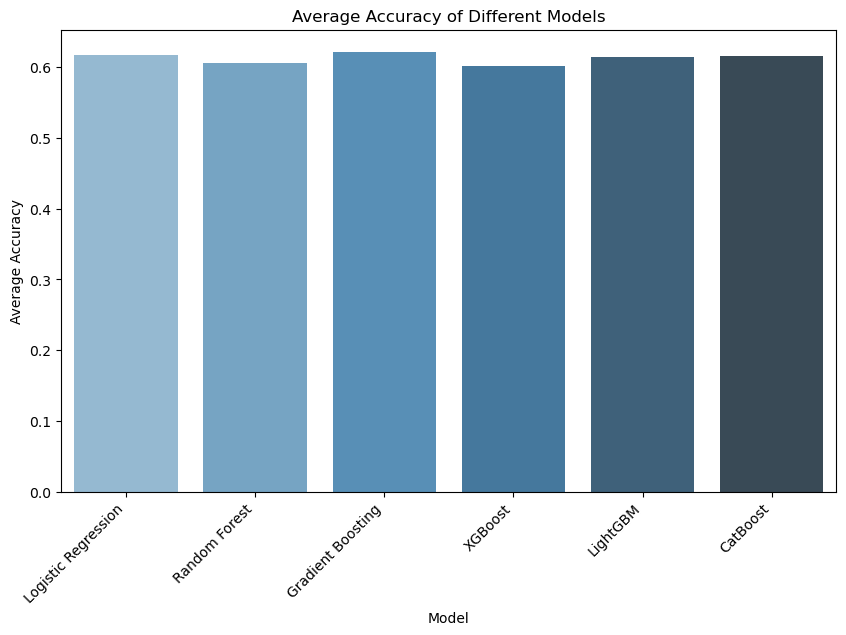

                 Model  Average Accuracy  Average Precision  Average Recall  \
0  Logistic Regression          0.616641           0.638594        0.541923   
1        Random Forest          0.605751           0.605956        0.610641   
2    Gradient Boosting          0.621902           0.633950        0.582199   
3              XGBoost          0.601713           0.607135        0.582452   
4             LightGBM          0.614562           0.621167        0.593066   
5             CatBoost          0.615845           0.623410        0.590013   

   Average F1 Score  
0          0.586223  
1          0.608236  
2          0.606821  
3          0.594472  
4          0.606709  
5          0.606174  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Initialize all models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# Store results for each model
results = []

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    
    # Create lists to store metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Perform 10-fold cross-validation
    for train_idx, val_idx in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Fit the model
        model.fit(X_train_fold, y_train_fold)
        
        # Get the predicted probabilities for the validation set
        y_val_preds = model.predict_proba(X_val_fold)[:, 1]
        
        # Convert probabilities to binary predictions using the threshold
        y_val_pred_binary = (y_val_preds >= 0.5).astype(int)
        
        # Calculate and store metrics for this fold
        accuracies.append(accuracy_score(y_val_fold, y_val_pred_binary))
        precisions.append(precision_score(y_val_fold, y_val_pred_binary))
        recalls.append(recall_score(y_val_fold, y_val_pred_binary))
        f1_scores.append(f1_score(y_val_fold, y_val_pred_binary))

    # Calculate average metrics
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    # Store the results in the list
    results.append({
        'Model': model_name,
        'Average Accuracy': avg_accuracy,
        'Average Precision': avg_precision,
        'Average Recall': avg_recall,
        'Average F1 Score': avg_f1
    })

    # Print out the metrics for each model
    print(f"{model_name} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"{model_name} - Average Precision: {avg_precision:.4f}")
    print(f"{model_name} - Average Recall: {avg_recall:.4f}")
    print(f"{model_name} - Average F1 Score: {avg_f1:.4f}\n")

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Visualize the average accuracies in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Average Accuracy', data=results_df, palette='Blues_d')
plt.title('Average Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Accuracy')
plt.xlabel('Model')
plt.show()

In [567]:
results_df

,Model,Average Accuracy,Average Precision,Average Recall,Average F1 Score
0,Logistic Regression,0.616641,0.638594,0.541923,0.586223
1,Random Forest,0.605751,0.605956,0.610641,0.608236
2,Gradient Boosting,0.621902,0.633950,0.582199,0.606821
3,XGBoost,0.601713,0.607135,0.582452,0.594472
4,LightGBM,0.614562,0.621167,0.593066,0.606709
5,CatBoost,0.615845,0.623410,0.590013,0.606174


### Analyzing results of baseline models:

In [563]:
base_models_results = pd.DataFrame({'classifier':['LOJ','LOJ','RF','RF','GBM','GBM','XGB','XGB','LGBM','LGBM','CATB','CATB'],
                           'data_set':['train','val']*6,
                          'auc':[lr_train_auc, lr_val_auc,rf_train_auc,rf_val_auc,gbc_train_auc,gbc_val_auc,xgb_train_auc,xgb_val_auc,lgbm_train_auc,lgbm_val_auc,catb_train_auc,catb_val_auc,],
                          'accuracy':[lr_train_accuracy, lr_val_accuracy,rf_train_accuracy,rf_val_accuracy,gbc_train_accuracy,gbc_val_accuracy,xgb_train_accuracy,xgb_val_accuracy,lgbm_train_accuracy,lgbm_val_accuracy,catb_train_accuracy,catb_val_accuracy,],
                          'recall':[lr_train_recall, lr_val_recall,rf_train_recall,rf_val_recall,gbc_train_recall,gbc_val_recall,xgb_train_recall,xgb_val_recall,lgbm_train_recall,lgbm_val_recall,catb_train_recall,catb_val_recall,],
                          'precision':[lr_train_precision, lr_val_precision,rf_train_precision,rf_val_precision,gbc_train_precision,gbc_val_precision,xgb_train_precision,xgb_val_precision,lgbm_train_precision,lgbm_val_precision,catb_train_precision,catb_val_precision,],
                          'fscore':[lr_train_fscore, lr_val_fscore,rf_train_fscore,rf_val_fscore,gbc_train_fscore,gbc_val_fscore,xgb_train_fscore,xgb_val_fscore,lgbm_train_fscore,lgbm_val_fscore,catb_train_fscore,catb_val_fscore,],
                          'specificity':[lr_train_specificity, lr_val_specificity,rf_train_specificity,rf_val_specificity,gbc_train_specificity,gbc_val_specificity,xgb_train_specificity,xgb_val_specificity,lgbm_train_specificity,lgbm_val_specificity,catb_train_specificity,catb_val_specificity,]})

In [564]:
base_models_results

,classifier,data_set,auc,accuracy,recall,precision,fscore,specificity
0,LOJ,train,0.668350,0.622637,0.547419,0.645788,0.592549,0.698234
1,LOJ,val,0.646504,0.602426,0.521800,0.613730,0.564044,0.680793
2,RF,train,0.675544,0.623371,0.578421,0.636877,0.606243,0.668548
3,RF,val,0.650717,0.600347,0.540788,0.605989,0.571535,0.658237
4,GBM,train,0.691722,0.641297,0.600879,0.655003,0.626774,0.681919
5,GBM,val,0.654610,0.613172,0.566104,0.617331,0.590609,0.658920
6,XGB,train,0.691722,0.641297,0.600879,0.655003,0.626774,0.681919
7,XGB,val,0.654610,0.613172,0.566104,0.617331,0.590609,0.658920
8,LGBM,train,0.684076,0.641236,0.603442,0.654055,0.627730,0.679220
9,LGBM,val,0.654048,0.606586,0.565401,0.608630,0.586219,0.646617


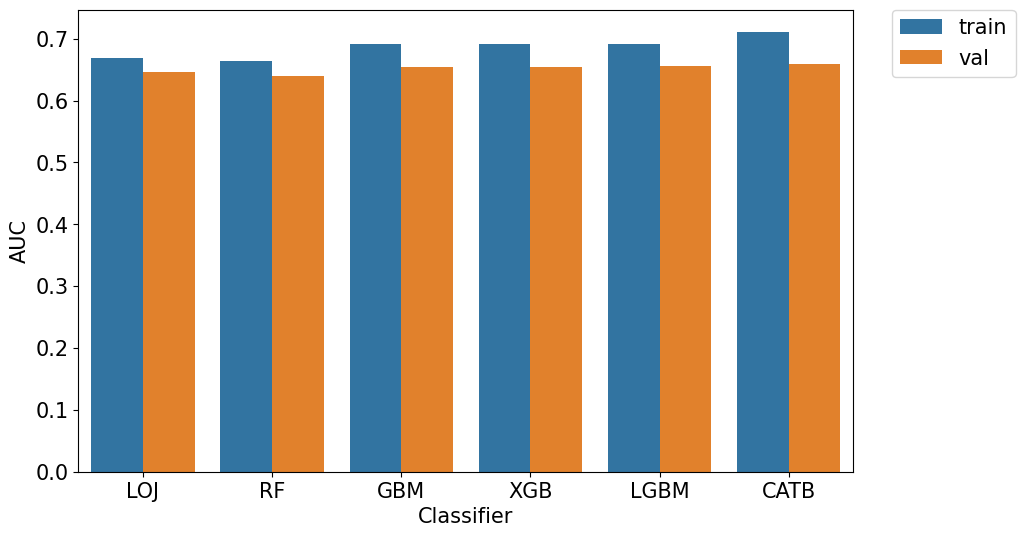

In [495]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=base_models_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

## <a id="6"></a>6. Feature Importance

### Feature İmportance with Light-GBM Classifier

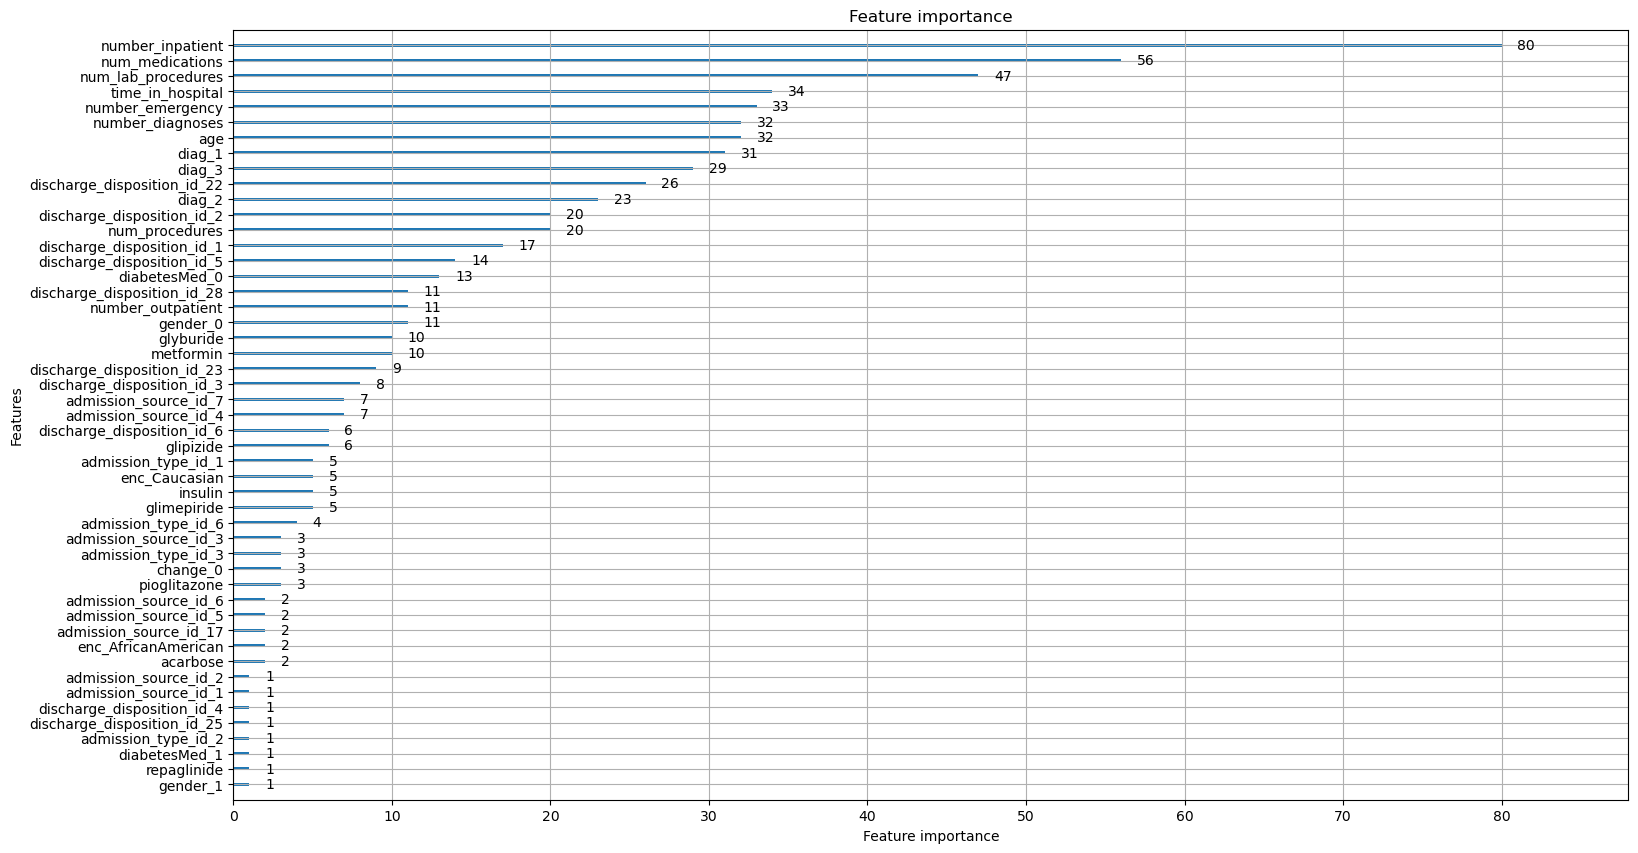

In [568]:
import lightgbm as lgb

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(25)

In [569]:
best_features.index

Index(['number_inpatient', 'num_medications', 'num_lab_procedures',
       'time_in_hospital', 'number_emergency', 'age', 'number_diagnoses',
       'diag_1', 'diag_3', 'discharge_disposition_id_22', 'diag_2',
       'num_procedures', 'discharge_disposition_id_2',
       'discharge_disposition_id_1', 'discharge_disposition_id_5',
       'diabetesMed_0', 'gender_0', 'number_outpatient',
       'discharge_disposition_id_28', 'metformin', 'glyburide',
       'discharge_disposition_id_23', 'discharge_disposition_id_3',
       'admission_source_id_4', 'admission_source_id_7'],
      dtype='object')

In [570]:
X_train_importance = X_train[best_features.index]
X_val_importance = X_val[best_features.index]
X_test_importance = X_test[best_features.index]

## <a id="7"></a>7. Hyperparameter Tuning

### Random Forest Classifier Model Tuning

In [499]:
rf = RandomForestClassifier()

In [500]:
rf_params = {"max_depth": [2,5,8],
             "n_estimators": [100,200,500,700],
             "max_features": [3,5,8],
             "min_samples_split":[2,5,10]}

In [501]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=2).fit(X_train_importance, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [502]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 700}

In [503]:
rf_tuned =RandomForestClassifier(max_depth=5,
                                 max_features=5,
                                 min_samples_split=5,
                                 n_estimators=500).fit(X_train_importance, y_train)

In [504]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_val_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_random = rf_tuned.predict_proba(X_val_importance)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_val_auc = roc_auc_score(y_val, y_val_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_val_auc))

Baseline Random Forest
Training AUC:0.663
Validation AUC:0.640
Optimized Random Forest
Training AUC:0.676
Validation AUC:0.651


### Ligth-GBM Classifier Model Tuning

In [505]:
lgbm=LGBMClassifier()

In [506]:
lgbm_params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2],
              "max_depth":[2,3,5,8]}

In [507]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [508]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.1}

In [509]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=2,n_estimators=200,subsample= 0.1).fit(X_train_importance, y_train)

In [510]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print('Baseline LGBM')
lgbm_train_auc_base = roc_auc_score(y_train, y_train_preds)
lgbm_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(lgbm_train_auc_base))
print('Validation AUC:%.3f'%(lgbm_val_auc_base))

print('Optimized LGBM')
y_train_preds_lgbm = lgbm_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_lgbm = lgbm_tuned.predict_proba(X_val_importance)[:,1]

lgbm_train_auc = roc_auc_score(y_train, y_train_preds_lgbm)
lgbm_val_auc = roc_auc_score(y_val, y_val_preds_lgbm)

print('Training AUC:%.3f'%(lgbm_train_auc))
print('Validation AUC:%.3f'%(lgbm_val_auc))

Baseline LGBM
Training AUC:0.691
Validation AUC:0.655
Optimized LGBM
Training AUC:0.684
Validation AUC:0.654


### CATBOOST Classifier Model Tuning

In [511]:
catb=CatBoostClassifier()

In [512]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.05,0.1],
            "depth":[4,5,8]}

In [513]:
catb_cv_model=GridSearchCV(catb,catb_params, cv=3, n_jobs=-1,  verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 0.6900580	total: 8.31ms	remaining: 1.65s
1:	learn: 0.6872184	total: 15.2ms	remaining: 1.5s
2:	learn: 0.6849672	total: 21.9ms	remaining: 1.43s
3:	learn: 0.6824124	total: 28ms	remaining: 1.37s
4:	learn: 0.6801689	total: 34.2ms	remaining: 1.33s
5:	learn: 0.6779723	total: 40.1ms	remaining: 1.3s
6:	learn: 0.6761525	total: 45.9ms	remaining: 1.26s
7:	learn: 0.6744355	total: 52.6ms	remaining: 1.26s
8:	learn: 0.6728159	total: 58ms	remaining: 1.23s
9:	learn: 0.6712770	total: 64.4ms	remaining: 1.22s
10:	learn: 0.6701338	total: 70.4ms	remaining: 1.21s
11:	learn: 0.6690457	total: 76.7ms	remaining: 1.2s
12:	learn: 0.6679264	total: 82.4ms	remaining: 1.19s
13:	learn: 0.6669807	total: 88.4ms	remaining: 1.17s
14:	learn: 0.6659295	total: 94.6ms	remaining: 1.17s
15:	learn: 0.6651227	total: 101ms	remaining: 1.16s
16:	learn: 0.6644273	total: 107ms	remaining: 1.15s
17:	learn: 0.6635882	total: 113ms	remaining: 1.14s
18:	learn: 0.6626930	to

In [514]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.05}

In [515]:
catb_tuned =CatBoostClassifier(depth=5,iterations=200,learning_rate=0.05).fit(X_train_importance, y_train)

0:	learn: 0.6900580	total: 7.09ms	remaining: 1.41s
1:	learn: 0.6872184	total: 14.3ms	remaining: 1.41s
2:	learn: 0.6849672	total: 20.6ms	remaining: 1.35s
3:	learn: 0.6824124	total: 26.1ms	remaining: 1.28s
4:	learn: 0.6801689	total: 31.7ms	remaining: 1.23s
5:	learn: 0.6779723	total: 37.6ms	remaining: 1.21s
6:	learn: 0.6761525	total: 43.7ms	remaining: 1.2s
7:	learn: 0.6744355	total: 49.9ms	remaining: 1.2s
8:	learn: 0.6728159	total: 55.4ms	remaining: 1.18s
9:	learn: 0.6712770	total: 61.7ms	remaining: 1.17s
10:	learn: 0.6701338	total: 67.9ms	remaining: 1.17s
11:	learn: 0.6690457	total: 74.5ms	remaining: 1.17s
12:	learn: 0.6679264	total: 80.9ms	remaining: 1.16s
13:	learn: 0.6669807	total: 86.9ms	remaining: 1.15s
14:	learn: 0.6659295	total: 93.2ms	remaining: 1.15s
15:	learn: 0.6651227	total: 99.3ms	remaining: 1.14s
16:	learn: 0.6644273	total: 106ms	remaining: 1.14s
17:	learn: 0.6635882	total: 113ms	remaining: 1.15s
18:	learn: 0.6626930	total: 120ms	remaining: 1.14s
19:	learn: 0.6619476	total:

In [516]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_valid_preds = cat_model.predict_proba(X_val)[:,1]

print('Baseline CATBOOST')
catb_train_auc_base = roc_auc_score(y_train, y_train_preds)
catb_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(catb_train_auc_base))
print('Validation AUC:%.3f'%(catb_val_auc_base))

print('Optimized CATBOOST')
y_train_preds_catb = catb_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_catb = catb_tuned.predict_proba(X_val_importance)[:,1]

catb_train_auc = roc_auc_score(y_train, y_train_preds_catb)
catb_val_auc = roc_auc_score(y_val, y_val_preds_catb)

print('Training AUC:%.3f'%(catb_train_auc))
print('Validation AUC:%.3f'%(catb_val_auc))

Baseline CATBOOST
Training AUC:0.711
Validation AUC:0.655
Optimized CATBOOST
Training AUC:0.700
Validation AUC:0.657


### Results of Hyperparameter Tuning

In [517]:
data_results = pd.DataFrame({'classifier':['RF','RF','LGBM','LGBM','CATB','CATB'],
                           'data_set':['base','optimized']*3,
                          'auc':[rf_val_auc_base,rf_val_auc,
                                 lgbm_val_auc_base,lgbm_val_auc,
                                 catb_val_auc_base,catb_val_auc,],
                          })

In [518]:
data_results

,classifier,data_set,auc
0,RF,base,0.639632
1,RF,optimized,0.650717
2,LGBM,base,0.655136
3,LGBM,optimized,0.654048
4,CATB,base,0.655136
5,CATB,optimized,0.657108


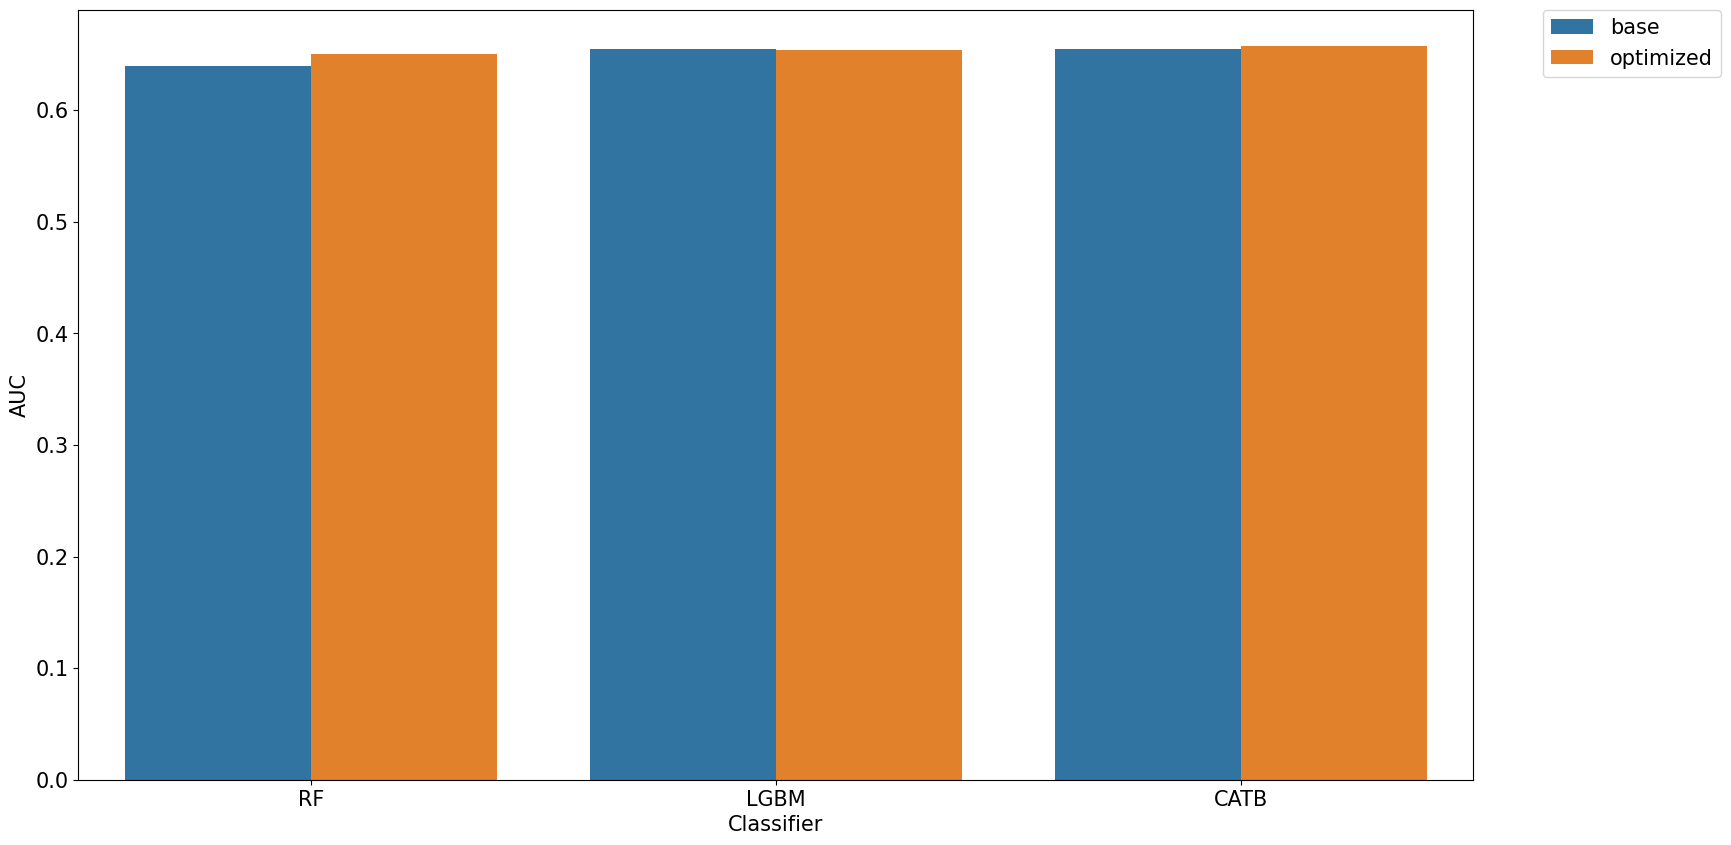

In [519]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=data_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

### Roc-Auc Comparison of Models

In [520]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# List of classifiers
classifiers = [rf_tuned, lgbm_tuned, catb_tuned]

# Initialize an empty list to store results
results = []

# Train the models and record the results
for cls in classifiers:
    # Get predicted probabilities
    yproba = cls.predict_proba(X_test_importance)[:, 1]
    
    # Compute false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Append results to the list
    results.append({
        'classifiers': cls.__class__.__name__,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    })

# Convert the results list to a DataFrame
result_table = pd.DataFrame(results)

# Set classifier names as index labels and sort by AUC
result_table.set_index('classifiers', inplace=True)
result_table.sort_values('auc', ascending=False, inplace=True)

# Display the result table
print(result_table)

                                                                      fpr  \
classifiers                                                                 
CatBoostClassifier      [0.0, 7.57460990758976e-05, 7.57460990758976e-...   
LGBMClassifier          [0.0, 7.57460990758976e-05, 0.0001514921981517...   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0001514921981517952, 0.00015...   

                                                                      tpr  \
classifiers                                                                 
CatBoostClassifier      [0.0, 0.0, 0.0005885815185403178, 0.0005885815...   
LGBMClassifier          [0.0, 0.0, 0.0, 0.0005885815185403178, 0.00058...   
RandomForestClassifier  [0.0, 0.0005885815185403178, 0.001177163037080...   

                             auc  
classifiers                       
CatBoostClassifier      0.674024  
LGBMClassifier          0.673265  
RandomForestClassifier  0.667819  


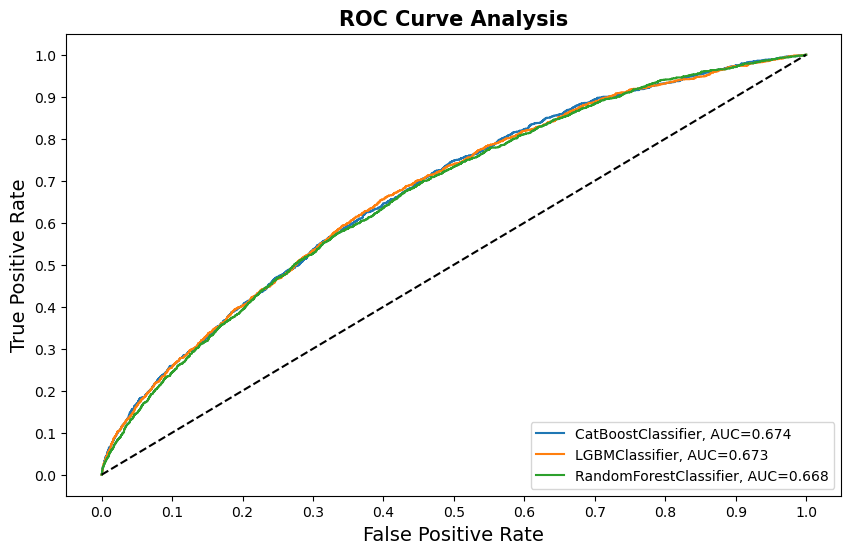

In [521]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=14)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [522]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score

# Define the test_scores function
def test_scores(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))  # Thresholding at the specified value
    recall = recall_score(y_actual, (y_pred > thresh))
    return auc, accuracy, recall

# List of classifiers
classifiers = [rf_tuned, lgbm_tuned, catb_tuned]

# Initialize an empty list to store results
results = []

# Train the models and record the results
for cls in classifiers:
    # Get predicted probabilities for the positive class
    y_test_preds = cls.predict_proba(X_test_importance)[:, 1]
    
    # Get scores using the test_scores function
    test_auc, test_accuracy, test_recall = test_scores(y_test, y_test_preds, 0.5)  # Threshold set to 0.5
    
    # Append results to the list
    results.append({
        'classifiers': cls.__class__.__name__,
        'accuracy': test_accuracy,
        'recall': test_recall,
        'auc': test_auc
    })

# Convert the results list to a DataFrame
test_result = pd.DataFrame(results)

# Set classifier names as index labels and sort by AUC
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc', ascending=False, inplace=True)

# Display the result table
print(test_result)


                        accuracy    recall       auc
classifiers                                         
CatBoostClassifier      0.649956  0.583284  0.674024
LGBMClassifier          0.652909  0.587404  0.673265
RandomForestClassifier  0.635930  0.593879  0.667819


In [523]:
import plotly.graph_objs as go

trace1=go.Bar(
                x=test_result.index,
                y=test_result.accuracy,
                name="Accuracy",
                marker= dict(color = 'rgba(100, 20, 30, 0.7)',
                            line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.accuracy,3),textposition='auto')
trace2=go.Bar(
                x=test_result.index,
                y=test_result.recall,
                name="Recall",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.recall,3),textposition='auto')
trace3=go.Bar(
                x=test_result.index,
                y=test_result.auc,
                name="AUC",
                marker=dict(color = 'rgba(120, 180, 20, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.auc,3),textposition='auto')

edit_df=[trace1,trace2,trace3]
layout = { 'barmode':'group',
           'title_text':'Accuracy, Recall and AUC Plot Readmitted' }

fig= go.Figure(data=edit_df,layout=layout)
#plt.savefig('graph.png')
fig.show()

## <a id="8"></a>8. Prediction Result

## Model Selection: Best Classifier

In [524]:
best_model = catb_tuned

y_train_preds = best_model.predict_proba(X_train_importance)[:,1]
y_valid_preds = best_model.predict_proba(X_val_importance)[:,1]
y_test_preds = best_model.predict_proba(X_test_importance)[:,1]

In [525]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_fscore, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
val_auc, val_accuracy, val_recall, val_precision, val_fscore,val_specificity = print_report(y_val,y_val_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_fscore, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.700
accuracy:0.644
recall:0.609
precision:0.656
fscore:0.632
specificity:0.678
 
Validation:
AUC:0.655
accuracy:0.607
recall:0.565
precision:0.609
fscore:0.586
specificity:0.647
 
Test:
AUC:0.674
accuracy:0.650
recall:0.583
precision:0.180
fscore:0.275
specificity:0.659
 


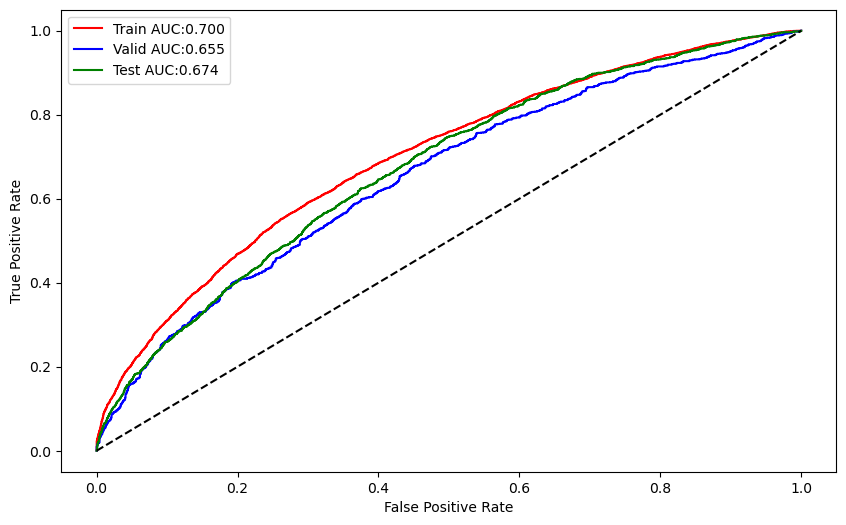

In [526]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_preds)
auc_val = roc_auc_score(y_val, y_val_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_val, tpr_val, 'b-',label ='Valid AUC:%.3f'%auc_val)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## <a id="9"></a>9. Conclusion

Based on the Auc results observed in the best classifier train, validation and test set results. It was observed that the best model was Catboost. The test result was almost %67 succesful. it was concluded that %67 of the patients who returned to the patient within 30 days returned and predicted correctly.

In [527]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [528]:
# Standardize the data (scale features to zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [529]:
# Define the NN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    BatchNormalization(),
    Dropout(0.3),  # Prevent overfitting
    
    Dense(32, activation='relu'),  # Second hidden layer
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),  # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [530]:
# Compile the model
model.compile(
    optimizer='adam',  # Adaptive moment estimation optimizer
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]  # Include AUC as a metric
)

In [531]:
# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Watch validation loss
    patience=10,         # Stop after 10 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

In [532]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,  # Max number of epochs
    batch_size=32,  # Mini-batch size
    callbacks=[early_stopping],
    verbose=1  # Show training progress
)

Epoch 1/100
511/511 [==============================] - 2s 2ms/step - loss: 0.7640 - accuracy: 0.5321 - auc: 0.5459 - val_loss: 0.6807 - val_accuracy: 0.5646 - val_auc: 0.5896
Epoch 2/100
511/511 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.5496 - auc: 0.5715 - val_loss: 0.6714 - val_accuracy: 0.5889 - val_auc: 0.6194
Epoch 3/100
511/511 [==============================] - 1s 1ms/step - loss: 0.6747 - accuracy: 0.5787 - auc: 0.6121 - val_loss: 0.6651 - val_accuracy: 0.5882 - val_auc: 0.6346
Epoch 4/100
511/511 [==============================] - 1s 1ms/step - loss: 0.6695 - accuracy: 0.5930 - auc: 0.6263 - val_loss: 0.6645 - val_accuracy: 0.5962 - val_auc: 0.6368
Epoch 5/100
511/511 [==============================] - 1s 1ms/step - loss: 0.6648 - accuracy: 0.6035 - auc: 0.6360 - val_loss: 0.6607 - val_accuracy: 0.5965 - val_auc: 0.6465
Epoch 6/100
511/511 [==============================] - 1s 1ms/step - loss: 0.6577 - accuracy: 0.6095 - auc: 0.6517 - val_loss

In [533]:
# Evaluate the model on test data
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

466/466 [==============================] - 0s 756us/step - loss: 0.6457 - accuracy: 0.6441 - auc: 0.6686
Test Loss: 0.6456835865974426
Test Accuracy: 0.6440507173538208
Test AUC: 0.6686198115348816


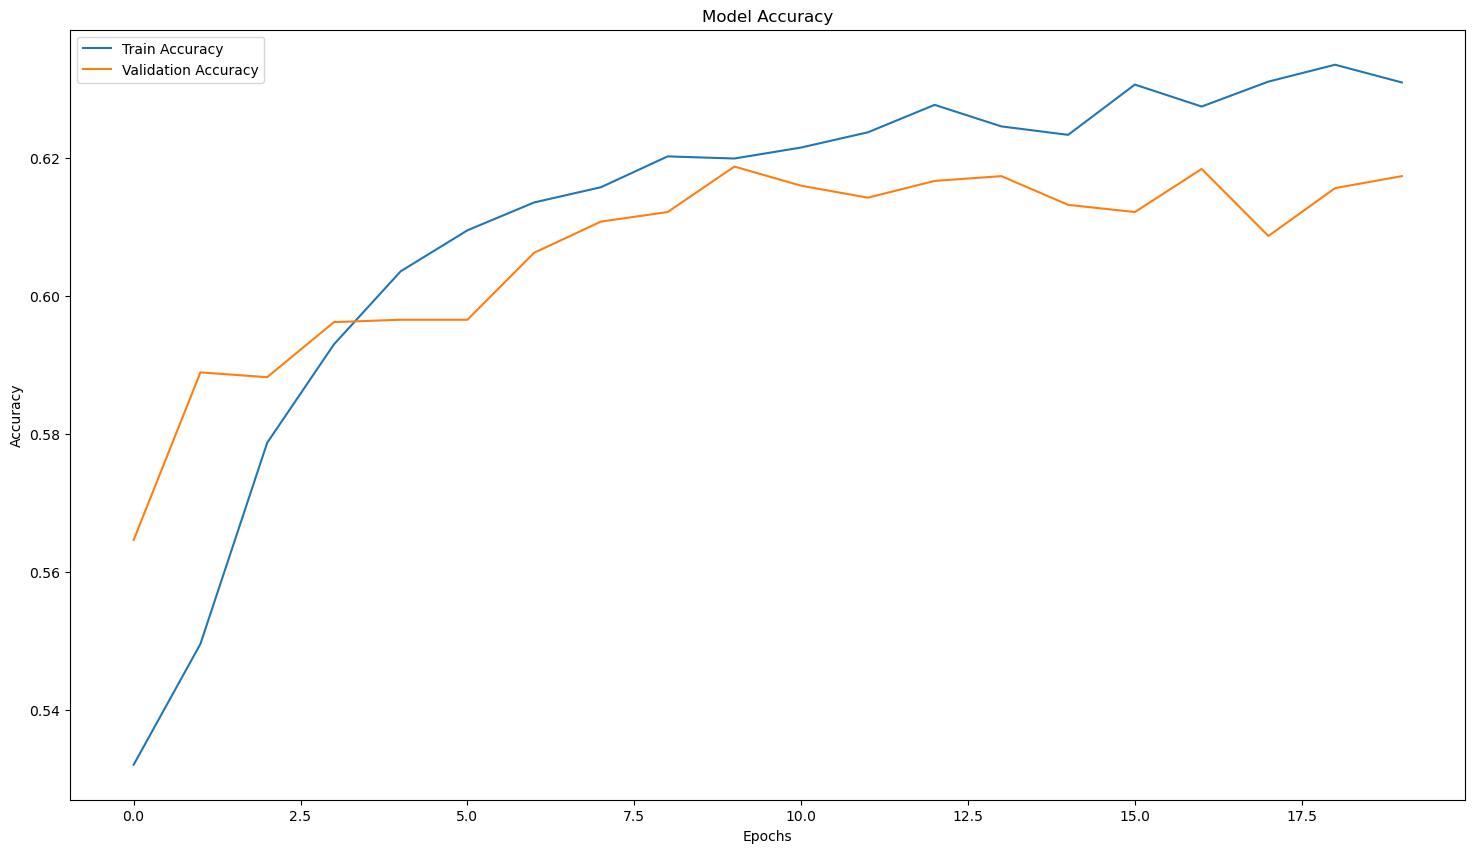

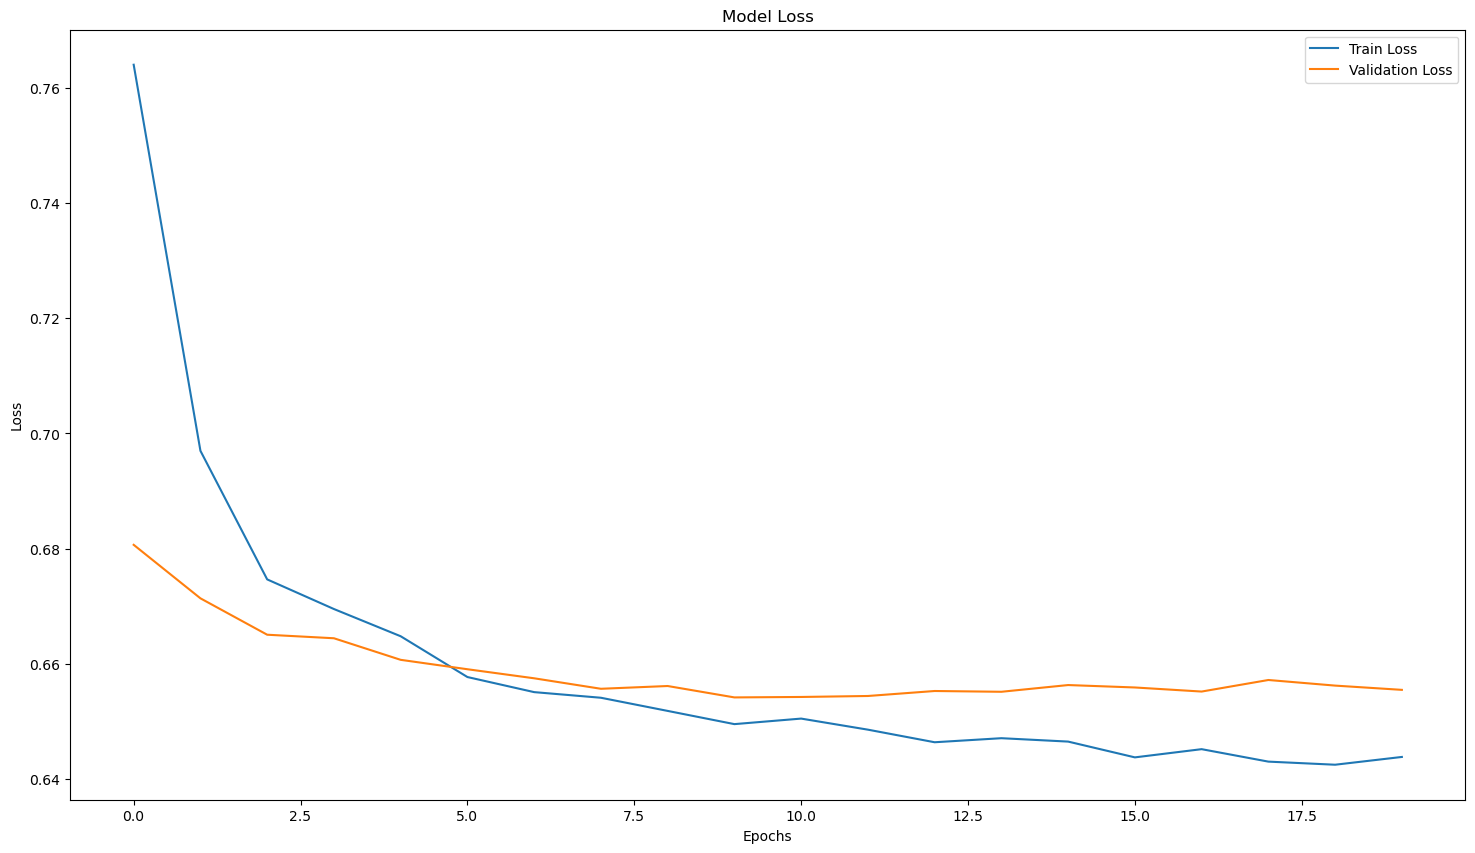

In [534]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [540]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [541]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [542]:
# Define the model-building function
def build_model(hp):
    model = tf.keras.Sequential()
    
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_dim=X_train.shape[1]
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third hidden layer
    model.add(Dense(
        units=hp.Int('units_3', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

In [543]:
# Create the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',  # You can use 'val_auc' or 'val_accuracy' depending on your preference
    max_epochs=50,  # Number of epochs for each model
    factor=3,  # Factor for scaling the search space
    directory='my_dir',  # Directory where the results will be saved
    project_name='diabetes_readmission'
)

In [544]:
# Perform the search for the best hyperparameters
tuner.search(
    X_train_scaled, y_train,
    epochs=50,  # Number of epochs for each trial
    validation_data=(X_val_scaled, y_val),
    batch_size=32
)

Trial 90 Complete [00h 00m 41s]
val_loss: 0.6582655906677246

Best val_loss So Far: 0.6533108353614807
Total elapsed time: 00h 14m 27s


In [545]:
# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [546]:
# Display the best hyperparameters
print("Best Hyperparameters: ", best_hp.values)

# Evaluate the best model on test data
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

Best Hyperparameters:  {'units_1': 128, 'units_2': 64, 'units_3': 16, 'learning_rate': 0.0017948732567158096, 'tuner/epochs': 17, 'tuner/initial_epoch': 6, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '0037'}
466/466 [==============================] - 1s 891us/step - loss: 0.6525 - accuracy: 0.6236 - auc: 0.6695
Test Loss: 0.6525105834007263
Test Accuracy: 0.6235823035240173
Test AUC: 0.669488787651062
